# import the needed libraies

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,roc_auc_score

import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

# reading the data

In [2]:
df=pd.read_csv('credit_score.csv')
noneed_col=['ID','Customer_ID','Month','Name','SSN']
categorical_col=['Type_of_Loan','Payment_Behaviour','Payment_of_Min_Amount','Credit_Mix','Credit_Score','Occupation']
numerical_col=['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts'  ,'Num_Credit_Card','Interest_Rate'  ,'Num_of_Loan'   ,'Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt' ,'Credit_Utilization_Ratio','Credit_History_Age' ,'Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
len(noneed_col)+len(categorical_col)+len(numerical_col)

28

# About Data


> 100000 rows ,28 column , 12500 customer,8 months ,There are no missing values in the DataFrame. 

* **ID** 
* **Customer_ID** : Represents a unique identification of a person
* **Month** : Represents the month of the year
* **Name** : Represents the name of a person
* **Age** : Represents the age of the person
* **SSN** : Represents the social security number of a person
* **Occupation** : Represents the occupation of the person
* **Annual_Income** : Represents the annual income of the person
* **Monthly_Inhand_Salary** : Represents the monthly base salary of a person
* **Num_Bank_Accounts** : Represents the number of bank accounts a person holds
* **Num_Credit_Card** : Represents the number of other credit cards held by a person
* **Interest_Rate** : Represents the interest rate on credit card
* **Num_of_Loan** : Represents the number of loans taken from the bank
* **Type_of_Loan** : Represents the types of loan taken by a person
* **Delay_from_due_date** : Represents the average number of days delayed from the payment date
* **Num_of_Delayed_Payment** : Represents the average number of payments delayed by a person
* **Changed_Credit_Limit** : Represents the percentage change in credit card limit
* **Num_Credit_Inquiries** : Represents the number of credit card inquiries
* **Credit_Mix** : Represents the classification of the mix of credits
* **Outstanding_Debt** : Represents the remaining debt to be paid (in USD)
* **Credit_Utilization_Ratio** : Represents the utilization ratio of credit card
* **Credit_History_Age** : Represents the age of credit history of the person
* **Payment_of_Min_Amount** : Represents whether only the minimum amount was paid by the person
* **Total_EMI_per_month** : Represents the monthly EMI payments (in USD)
* **Amount_invested_monthly** : Represents the monthly amount invested by the customer (in USD)
* **Payment_Behaviour** : Represents the payment behavior of the customer (in USD)
* **Monthly_Balance** : Represents the monthly balance amount of the customer (in USD)
* **Credit_Score** : Represents the bracket of credit score (Poor, Standard, Good)

## numerical data distributions 

array([[<AxesSubplot: title={'center': 'Month'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Annual_Income'}>,
        <AxesSubplot: title={'center': 'Monthly_Inhand_Salary'}>],
       [<AxesSubplot: title={'center': 'Num_Bank_Accounts'}>,
        <AxesSubplot: title={'center': 'Num_Credit_Card'}>,
        <AxesSubplot: title={'center': 'Interest_Rate'}>,
        <AxesSubplot: title={'center': 'Num_of_Loan'}>],
       [<AxesSubplot: title={'center': 'Delay_from_due_date'}>,
        <AxesSubplot: title={'center': 'Num_of_Delayed_Payment'}>,
        <AxesSubplot: title={'center': 'Changed_Credit_Limit'}>,
        <AxesSubplot: title={'center': 'Num_Credit_Inquiries'}>],
       [<AxesSubplot: title={'center': 'Outstanding_Debt'}>,
        <AxesSubplot: title={'center': 'Credit_Utilization_Ratio'}>,
        <AxesSubplot: title={'center': 'Credit_History_Age'}>,
        <AxesSubplot: title={'center': 'Total_EMI_per_month'}>],
       [<AxesSubplot

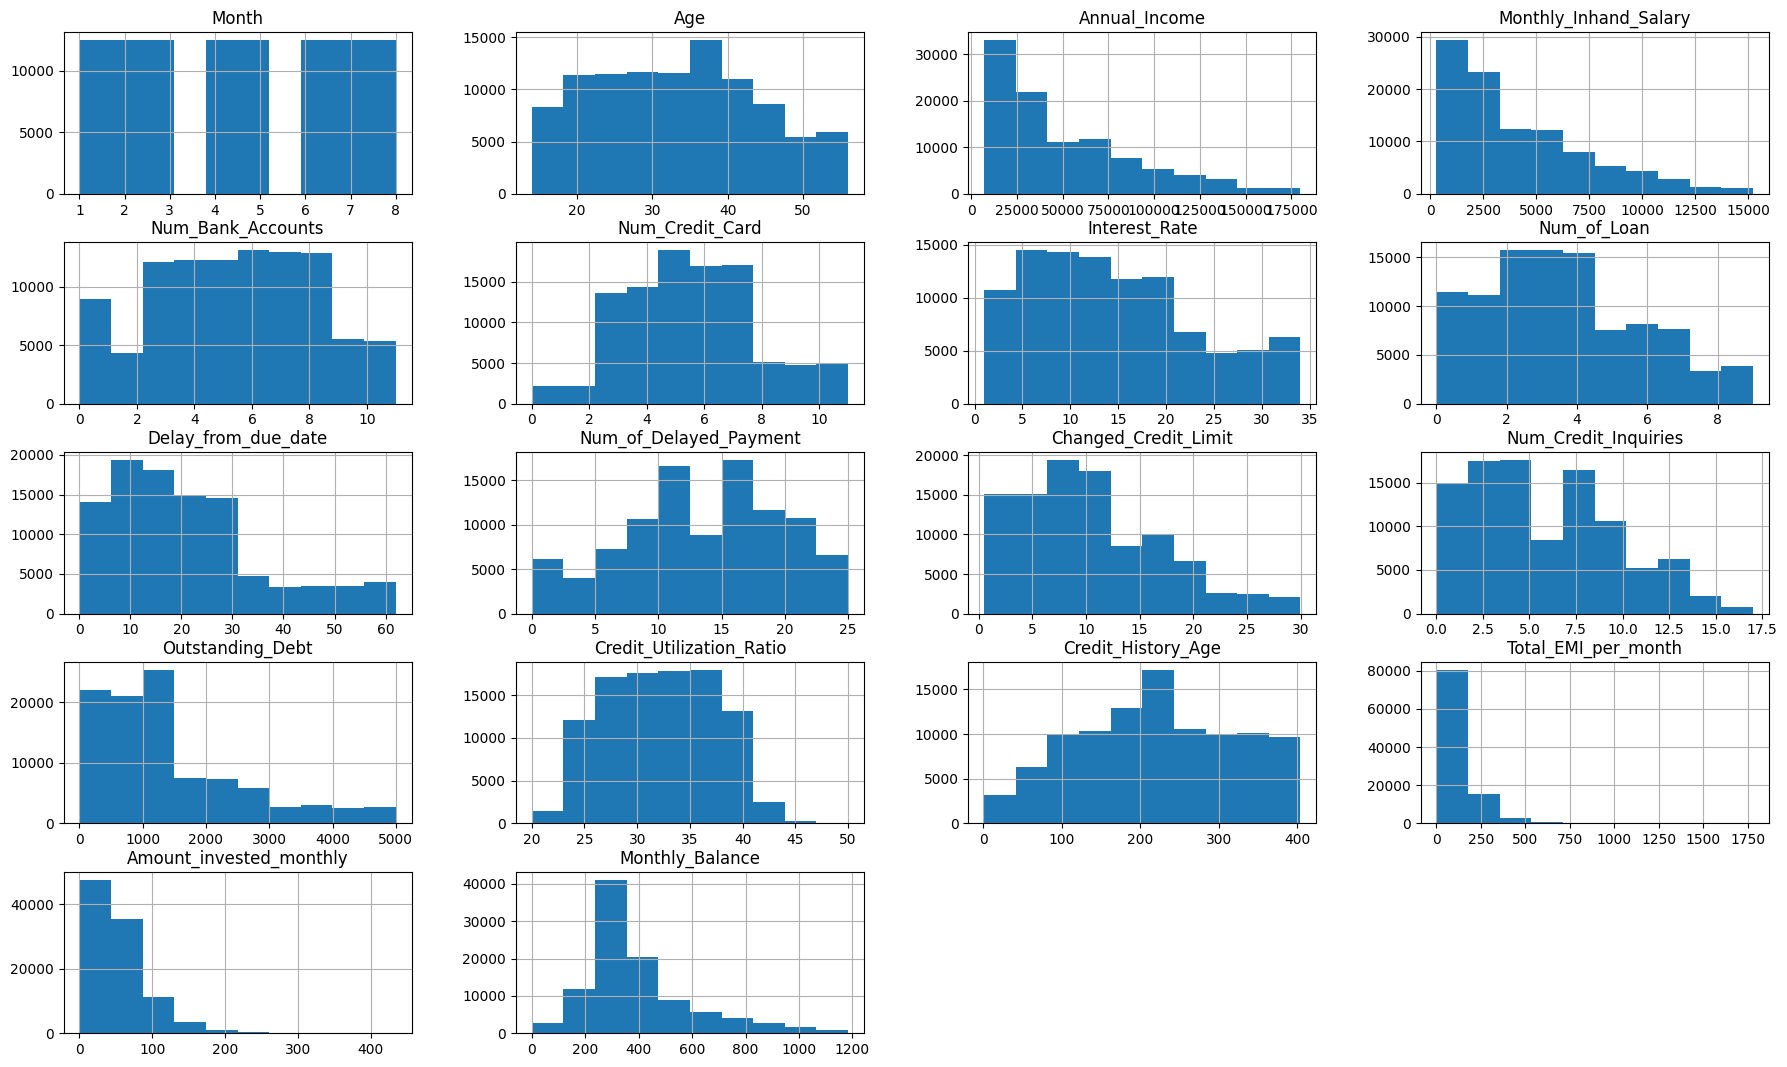

In [3]:
df.drop(['ID','Customer_ID','SSN'],axis=1).hist(figsize=(22,13))

## categorical data value counts  

* Occupation 

| Occupation | counts |
| --- | --- |
| Lawyer       | 7096|
| Engineer     | 6864|
| Architect    | 6824|
| Mechanic     | 6776|
| Scientist    | 6744|
| Accountant   | 6744|
| Developer    | 6720|
| Media_Manager| 6720|
| Teacher      | 6672|
| Entrepreneur | 6648|
| Doctor       | 6568|
| Journalist   | 6536|
| Manager      | 6432|
| Musician     | 6352|
| Writer       | 6304|
* Credit_Mix

| Credit_Mix | counts |
| --- | --- |
|Standard    |45848|
|Good        |30384|
|Bad         |23768|
* Payment_Behaviour

| Payment_Behaviour | counts |
| --- | --- |
|Low_spent_Small_value_payments      |28616|
|High_spent_Medium_value_payments    |19738|
|High_spent_Large_value_payments     |14726|
|Low_spent_Medium_value_payments     |14399|
|High_spent_Small_value_payments     |11764|
|Low_spent_Large_value_payments      |10757|
* Payment_of_Min_Amount

| Payment_of_Min_Amount | counts |
| --- | --- |
|Yes |52326|
|No  |35667|
|NM  |12007|

* Credit_Score

| Credit_Score | counts |
| --- | --- |
|Standard    |53174|
|Poor        |28998|
|Good        |17828|

* Type_of_Loan 
> df['Type_of_Loan'].str.replace(' and ', '').str.split(',').explode().str.strip().value_counts()


| Type_of_Loan | counts |
| --- | --- |
|Payday Loan               |40568|
|Credit-Builder Loan       |40440|
|Not Specified             |39616|
|Home Equity Loan          |39104|
|Student Loan              |38968|
|Mortgage Loan             |38936|
|Personal Loan             |38888|
|Debt Consolidation Loan   |38776|
|Auto Loan                 |37992|
|No Data                   |11408|

In [4]:
def pie_chart(data,col):
    if col == 'Type_of_Loan':
        label = data[col].str.replace(' and ', '').str.split(',').explode().str.strip().value_counts().index
        label_count = data[col].str.replace(' and ', '').str.split(',').explode().str.strip().value_counts().values
    else:
        label = data[col].value_counts().index
        label_count = data[col].value_counts().values
    
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.pie(data=data, x=label_count, labels=label, autopct='%1.1f%%', startangle=90)
    ax.set_title(col)
    # plt.legend()
    plt.show()

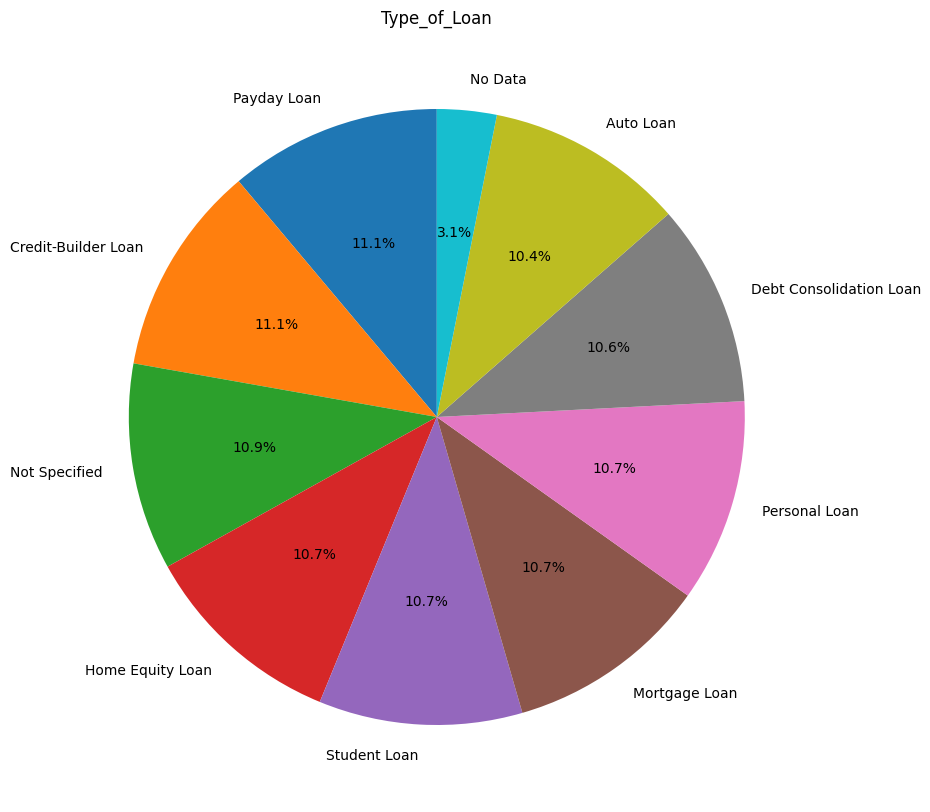

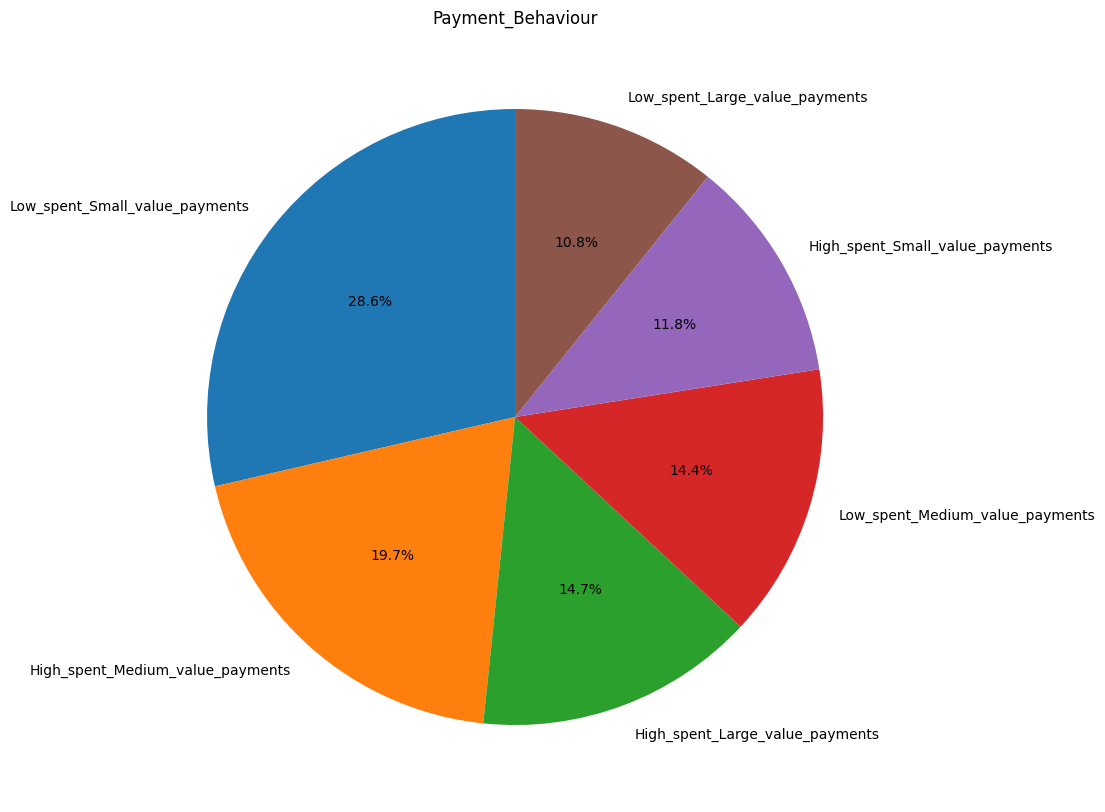

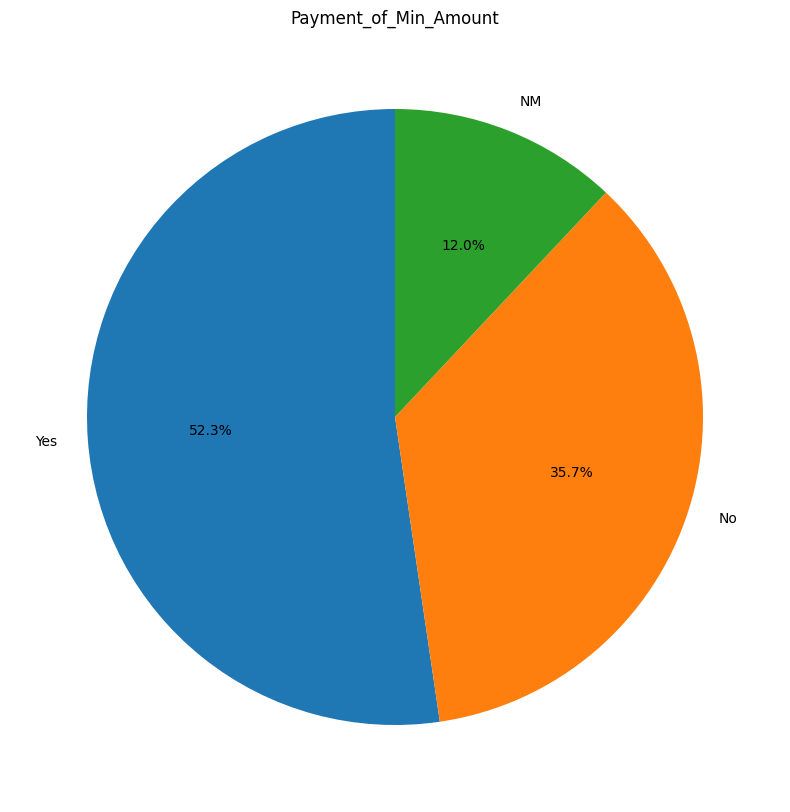

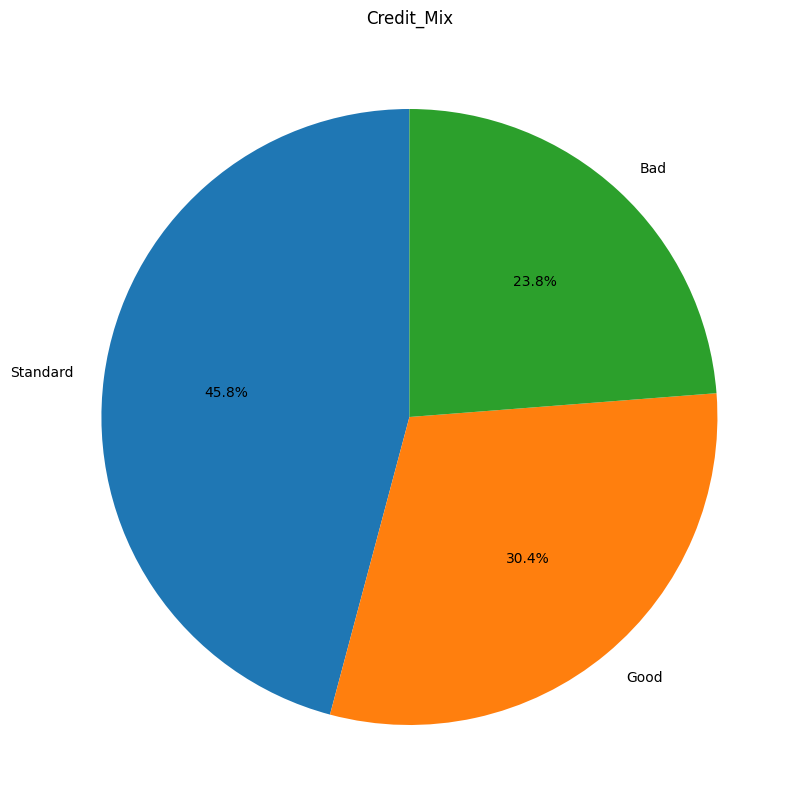

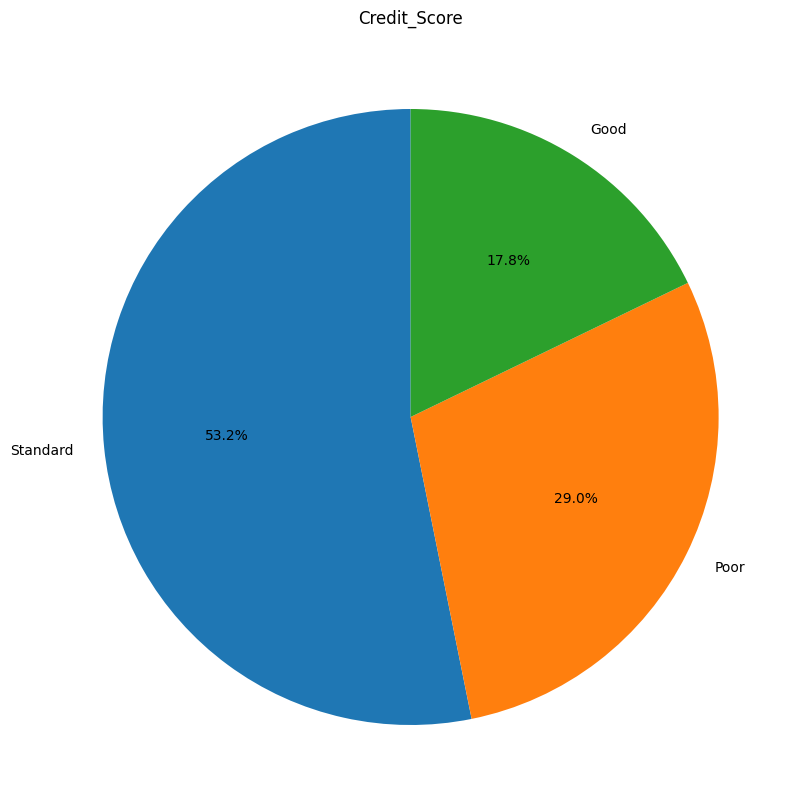

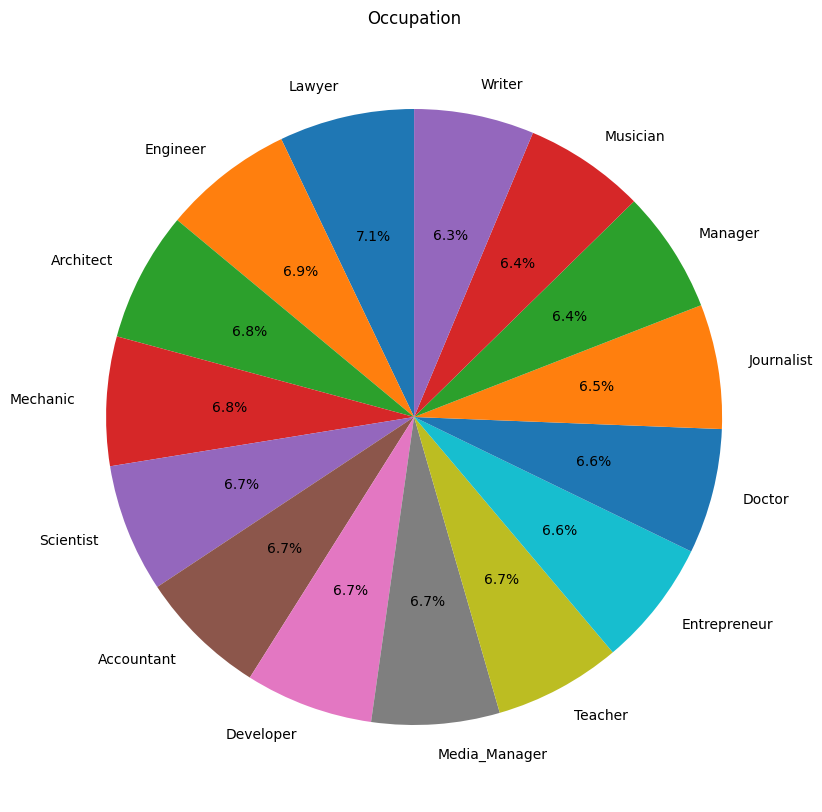

In [5]:
for col in categorical_col:
    pie_chart(df,col)

---
# exploring the data

In [6]:
agg_dict = {col: 'mean' if df[col].dtype in ['int64', 'float64'] else lambda x: x.str.replace(' and ', '').str.split(',').explode().str.strip().value_counts().index[0] for col in df.columns}

In [7]:
df['Type_of_Loan'].str.replace(' and ', '').str.split(',').explode().str.strip().value_counts().index

Index(['Payday Loan', 'Credit-Builder Loan', 'Not Specified',
       'Home Equity Loan', 'Student Loan', 'Mortgage Loan', 'Personal Loan',
       'Debt Consolidation Loan', 'Auto Loan', 'No Data'],
      dtype='object')

In [8]:
def number_outliers(data,column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    num_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)].shape[0]
    return num_outliers

## does each Occupation have diffrent behaviour

In [9]:
df.groupby('Occupation')[categorical_col].agg(lambda x: x.str.replace(' and ', '').str.split(',').explode().str.strip().value_counts().index[0])

,Type_of_Loan,Payment_Behaviour,Payment_of_Min_Amount,Credit_Mix,Credit_Score,Occupation
Occupation,,,,,,
Accountant,Personal Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Accountant
Architect,Payday Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Architect
Developer,Mortgage Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Developer
Doctor,Mortgage Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Doctor
Engineer,Credit-Builder Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Engineer
Entrepreneur,Not Specified,Low_spent_Small_value_payments,Yes,Standard,Standard,Entrepreneur
Journalist,Student Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Journalist
Lawyer,Personal Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Lawyer
Manager,Mortgage Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Manager


In [10]:
df.groupby('Occupation')[numerical_col].mean()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Occupation,,,,,,,,,,,,,,,,,
Accountant,33.583333,50726.120480,4216.962042,5.314650,5.558126,14.567023,3.527877,21.149170,13.457147,10.855030,5.860617,1437.899692,32.284384,220.327550,110.878262,55.946485,394.136740
Architect,33.463658,51875.392298,4316.155800,5.327081,5.452227,13.989449,3.422040,20.453986,13.254543,10.166981,5.589683,1343.206471,32.356069,226.735785,108.408140,56.466135,399.349824
Developer,33.292113,50128.422143,4163.388887,5.345387,5.619792,14.695238,3.605952,21.251488,13.484970,10.696935,5.875298,1440.633464,32.262524,219.107589,104.803925,54.600054,394.048467
Doctor,33.068819,49517.749976,4120.477608,5.386419,5.491017,14.489647,3.697929,20.833283,13.410018,10.480822,5.780451,1452.149013,32.228175,220.161541,111.119796,54.429357,387.307192
Engineer,32.523456,50730.654073,4216.266751,5.385927,5.535693,14.707459,3.545455,21.720425,13.263112,10.688625,5.900641,1451.853578,32.411861,217.463432,104.798921,53.634943,395.634919
Entrepreneur,33.350030,50987.698177,4237.066988,5.378610,5.573406,14.509025,3.641396,21.141847,13.245638,10.078748,5.874699,1397.060361,32.223078,222.625602,113.904159,55.409847,388.559501
Journalist,33.926714,48430.088415,4027.029770,5.391065,5.579253,14.473684,3.402693,20.272338,13.349755,10.394871,5.774021,1448.889204,32.182588,225.716034,99.795654,53.208047,386.206094
Lawyer,33.928833,49594.217396,4124.218989,5.235626,5.481962,14.506201,3.479143,20.870772,13.164600,10.406770,5.719560,1351.291962,32.207675,220.509724,102.770095,54.660136,390.723212
Manager,32.886039,51466.767817,4271.984515,5.394900,5.475435,14.835821,3.541045,21.280473,13.460821,10.442195,5.814521,1462.104826,32.397883,222.264614,107.959775,56.154971,398.625219


In [11]:
for i in df['Occupation'].unique():
    print(f"{i} {number_outliers(df[df['Occupation']==i],'Annual_Income')}")

Scientist 120
Teacher 104
Engineer 144
Entrepreneur 152
Developer 168
Lawyer 136
Media_Manager 120
Doctor 112
Journalist 224
Manager 144
Accountant 200
Musician 144
Mechanic 120
Writer 80
Architect 152


## does each age have diffrent behaviour

In [12]:
def age_groups(age):
    if age<20:
        return 'less_than_20'
    elif age>=20 and age<25:
        return '20-25'
    elif age>=25 and age<30:
        return '25-30'
    elif age>=30 and age<35:
        return '30-35'
    elif age>=35 and age<40:
        return '35-40'
    elif age>=40 and age<45:
        return '40-45'
    elif age>=45 and age<50:
        return '45-50'
    elif age>=50:
        return "more_than_50"
df2=df.copy()    
df2['Age']=df2['Age'].apply(age_groups)


In [13]:
df2.groupby('Age')[categorical_col].agg(lambda x: x.str.replace(' and ', '').str.split(',').explode().str.strip().value_counts().index[0])

,Type_of_Loan,Payment_Behaviour,Payment_of_Min_Amount,Credit_Mix,Credit_Score,Occupation
Age,,,,,,
20-25,Payday Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Engineer
25-30,Credit-Builder Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Accountant
30-35,Payday Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Lawyer
35-40,Payday Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Media_Manager
40-45,Student Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Architect
45-50,Credit-Builder Loan,Low_spent_Small_value_payments,No,Good,Standard,Developer
less_than_20,Credit-Builder Loan,Low_spent_Small_value_payments,Yes,Standard,Standard,Teacher
more_than_50,Payday Loan,Low_spent_Small_value_payments,No,Good,Standard,Journalist


In [14]:
df2.groupby('Age')[numerical_col].mean().sort_values(by='Annual_Income')

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,,,,,,,,,,,,,,,,
less_than_20,43750.260421,3632.515455,6.213160,6.072784,17.975291,4.503760,26.068935,15.509490,12.311622,7.573321,1857.726242,31.968738,177.280842,122.128972,49.396679,347.571188
35-40,48277.403473,4008.084441,5.487638,5.631368,15.177965,3.717158,22.214441,13.746638,10.973665,6.115270,1522.543673,32.267870,212.723883,109.817569,54.170296,381.873766
25-30,48771.500799,4055.231352,5.602730,5.577115,15.133617,3.685253,21.729386,13.718843,10.887201,6.115842,1490.929127,32.214296,213.170519,106.320194,53.555796,383.265516
40-45,48982.214359,4071.416735,5.496550,5.586028,15.122610,3.655167,21.964640,13.466796,10.707523,6.003234,1466.120824,32.186137,215.930286,105.801314,53.498409,385.073798
20-25,50326.259883,4191.337251,5.504457,5.626471,14.810953,3.628111,21.298082,13.358696,10.635118,6.039293,1473.082925,32.361305,219.566997,110.341496,55.202526,390.568873
30-35,50825.792719,4224.671042,5.452918,5.691252,15.190556,3.679412,21.768004,13.711938,10.698909,5.964549,1490.499828,32.253768,213.375052,108.848897,55.367658,390.124393
45-50,57462.978165,4775.091113,4.533129,5.000354,11.127564,2.626621,16.470880,11.482433,8.508902,4.288022,1018.373952,32.536403,259.111412,97.173505,60.489531,436.864103
more_than_50,61515.816127,5103.538284,3.911306,4.610193,8.723726,1.978559,13.107440,9.810545,7.376917,2.868658,738.309169,32.691538,294.219449,94.830221,63.496310,463.139399


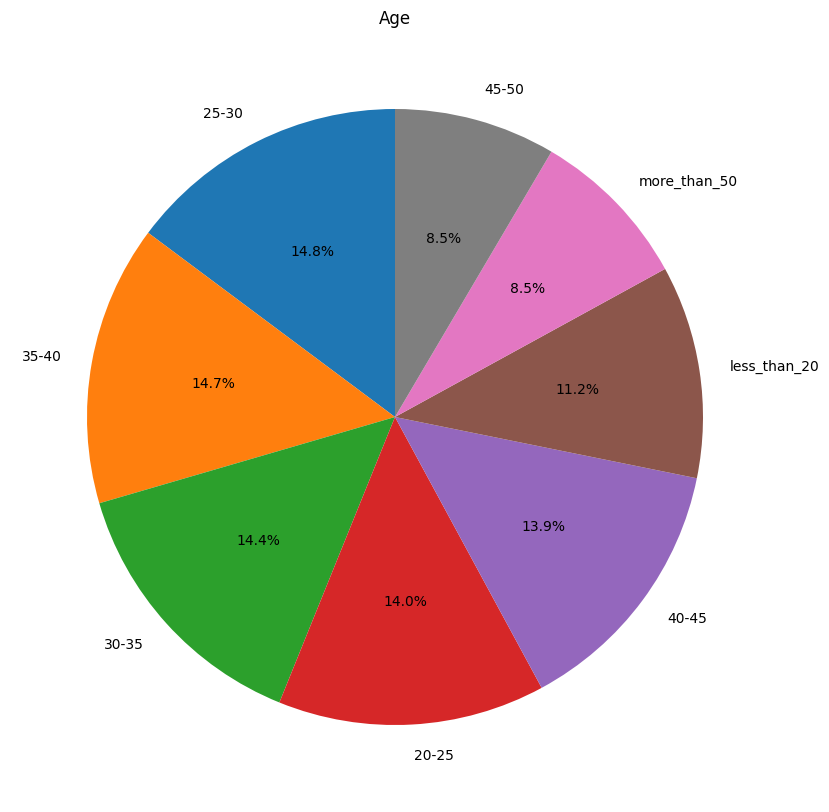

In [15]:
pie_chart(df2,'Age')

In [16]:
for i in df2['Occupation'].unique():
    for j in df2['Age'].unique():
        print(f"{i} {j} {number_outliers(df2[(df2['Age']==j) & (df2['Occupation']==i)],'Annual_Income')}")


Scientist 20-25 8
Scientist 25-30 26
Scientist 30-35 55
Scientist more_than_50 0
Scientist 40-45 8
Scientist 45-50 0
Scientist 35-40 16
Scientist less_than_20 24
Teacher 20-25 0
Teacher 25-30 8
Teacher 30-35 37
Teacher more_than_50 16
Teacher 40-45 8
Teacher 45-50 5
Teacher 35-40 11
Teacher less_than_20 25
Engineer 20-25 59
Engineer 25-30 30
Engineer 30-35 24
Engineer more_than_50 0
Engineer 40-45 14
Engineer 45-50 0
Engineer 35-40 18
Engineer less_than_20 47
Entrepreneur 20-25 0
Entrepreneur 25-30 8
Entrepreneur 30-35 64
Entrepreneur more_than_50 0
Entrepreneur 40-45 8
Entrepreneur 45-50 16
Entrepreneur 35-40 8
Entrepreneur less_than_20 40
Developer 20-25 8
Developer 25-30 44
Developer 30-35 8
Developer more_than_50 24
Developer 40-45 24
Developer 45-50 8
Developer 35-40 16
Developer less_than_20 16
Lawyer 20-25 22
Lawyer 25-30 26
Lawyer 30-35 24
Lawyer more_than_50 0
Lawyer 40-45 65
Lawyer 45-50 24
Lawyer 35-40 8
Lawyer less_than_20 16
Media_Manager 20-25 13
Media_Manager 25-30 0
Med

## top 5% 

In [17]:
top5_ID=df.groupby('Customer_ID')[numerical_col].mean().sort_values(by='Annual_Income',ascending=False).index[:int(12500*0.05)]

top5_df=df[df['Customer_ID'].isin( top5_ID)].groupby('Customer_ID').agg(agg_dict).sort_values(by='Annual_Income',ascending=False).drop('Customer_ID',axis=1)
not_top5_df=df[~df['Customer_ID'].isin(top5_ID)].groupby('Customer_ID').agg(agg_dict).sort_values(by='Annual_Income',ascending=False).drop('Customer_ID',axis=1)


Text(0.5, 0.98, 'all data')

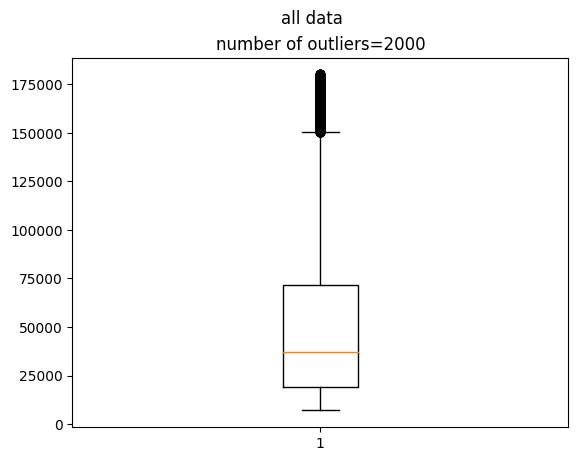

In [18]:
plt.boxplot(df['Annual_Income'],)
plt.title(f'number of outliers={number_outliers(df,"Annual_Income")}')
plt.suptitle('all data')

<AxesSubplot: title={'center': 'Annual_Income'}, xlabel='Credit_Score'>

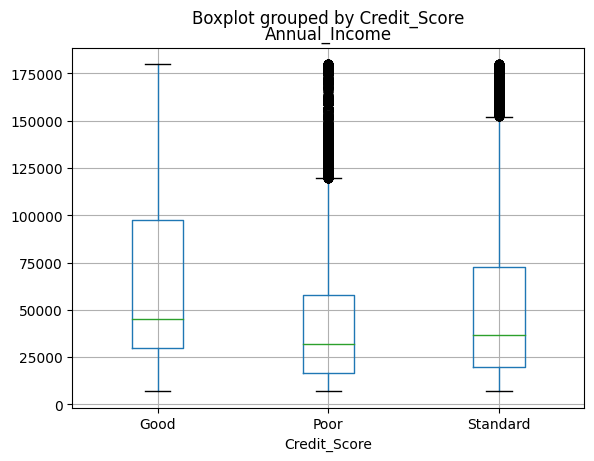

In [19]:
df.boxplot('Annual_Income',by='Credit_Score')


In [20]:
top5_df

,ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
5960,29169.5,4.5,Olga Dzyubenkop,34.750,958256723.0,Mechanic,179987.28,14816.940000,5.0,5.0,8.0,4.0,Mortgage Loan,14.375,10.250,1.290,1.000,Good,741.28,35.787607,250.500,No,417.843991,107.772897,High_spent_Large_value_payments,662.921315,Poor
25321,18669.5,4.5,Woodallf,32.875,678344743.0,Teacher,179948.84,14836.736667,0.0,5.0,4.0,3.0,Mortgage Loan,29.250,0.625,2.225,2.750,Good,1104.31,33.027267,377.500,No,446.259347,112.532159,Low_spent_Medium_value_payments,639.813534,Poor
32209,31701.5,4.5,N.u,47.000,929088298.0,Developer,179825.36,14866.446667,5.0,6.0,2.0,4.0,Auto Loan,5.875,5.375,10.905,0.000,Good,485.78,31.818859,226.500,No,561.932993,144.492492,High_spent_Large_value_payments,577.614479,Standard
13232,149877.5,4.5,Daniel Trottas,42.000,406008686.0,Doctor,179317.04,15091.086667,0.0,6.0,7.0,1.0,Mortgage Loan,15.375,3.000,1.540,3.250,Good,80.93,36.693302,371.625,No,142.787063,142.529277,High_spent_Large_value_payments,436.230862,Good
3023,99729.5,4.5,Lisa Lambertm,44.000,420944649.0,Lawyer,179239.60,15204.633333,5.0,4.0,1.0,2.0,Personal Loan,1.000,8.375,4.670,3.000,Good,1246.12,38.634598,223.500,No,208.797378,100.848772,High_spent_Large_value_payments,555.643678,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25352,147981.5,4.5,Rick Rothackerm,43.000,254434736.0,Scientist,130433.68,10597.473333,1.0,1.0,10.0,0.0,No Data,4.625,10.000,7.850,1.625,Good,825.55,34.876667,319.500,No,0.000000,74.617332,High_spent_Medium_value_payments,705.910891,Standard
26837,66369.5,4.5,Vladimir Soldatkinb,23.750,856147201.0,Entrepreneur,130402.88,10187.667364,4.0,5.0,7.0,1.0,Auto Loan,4.000,7.500,11.060,1.250,Good,943.72,37.246265,361.500,No,608.200129,105.130650,High_spent_Medium_value_payments,900.300653,Good
20339,120537.5,4.5,James B.f,30.000,702913353.0,Mechanic,130393.96,10618.163333,4.0,6.0,9.0,1.0,Mortgage Loan,11.000,14.625,7.765,1.000,Standard,719.76,33.554235,214.500,No,72.345751,91.544305,Low_spent_Large_value_payments,765.396646,Standard


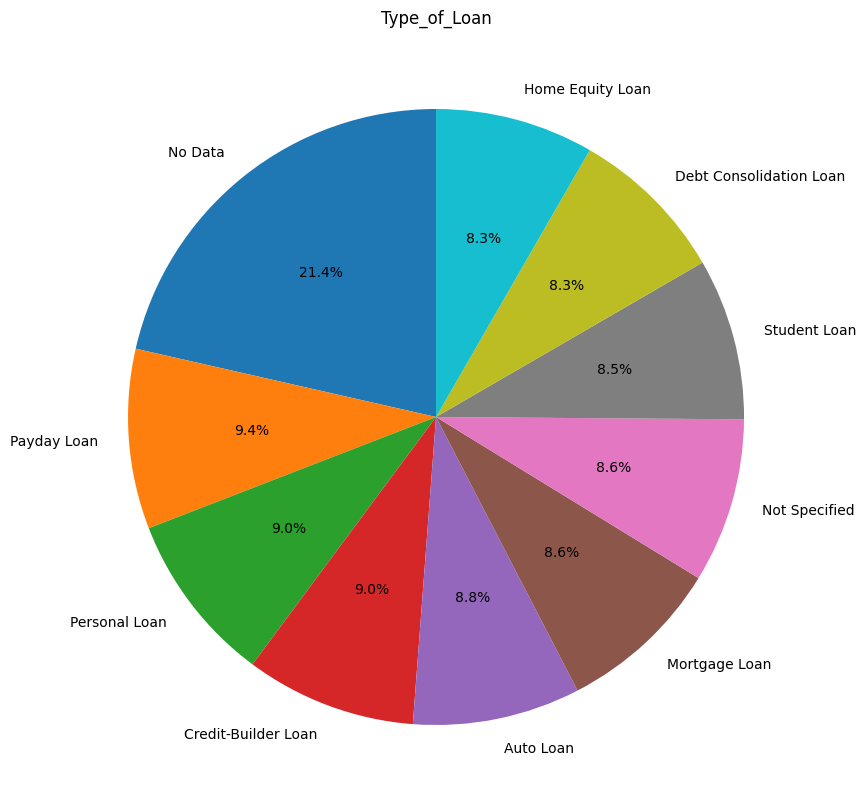

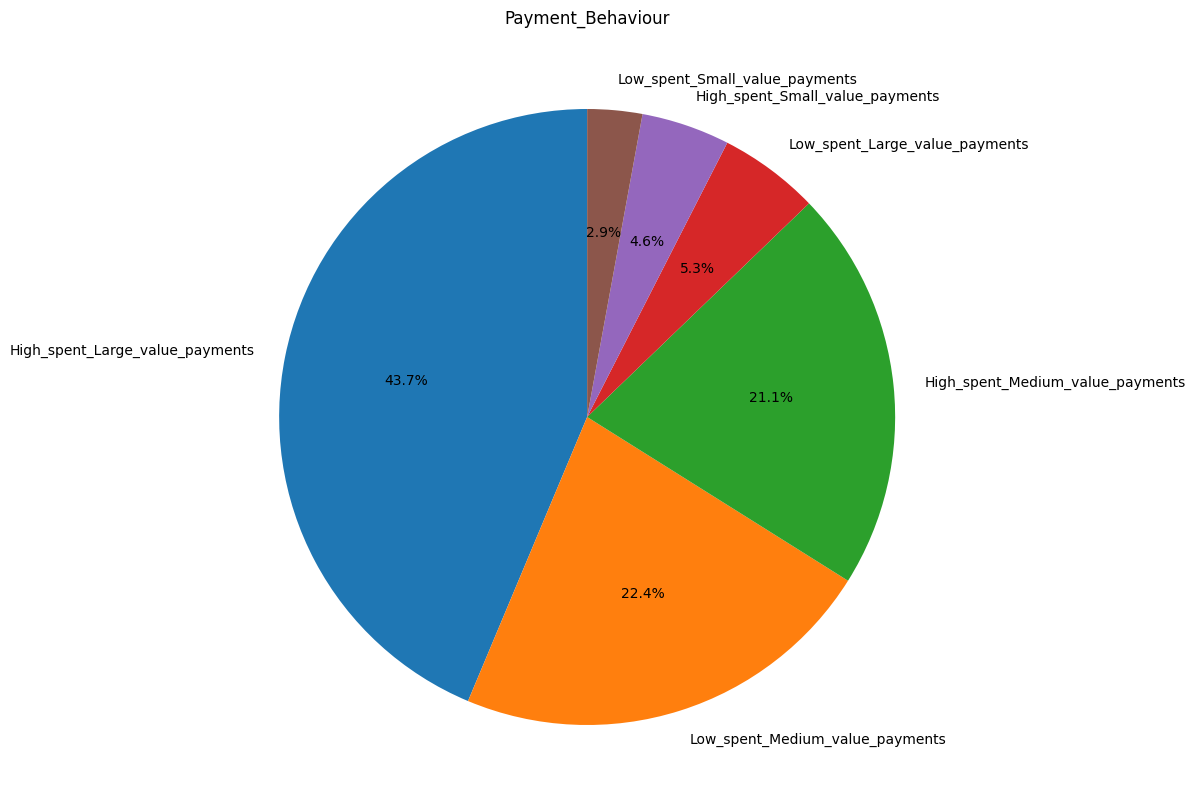

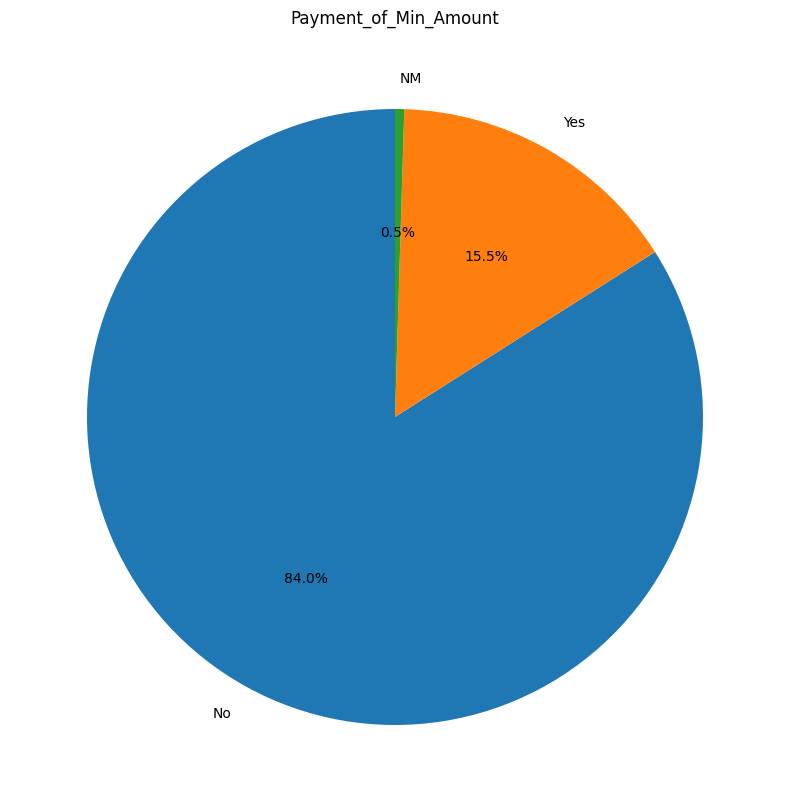

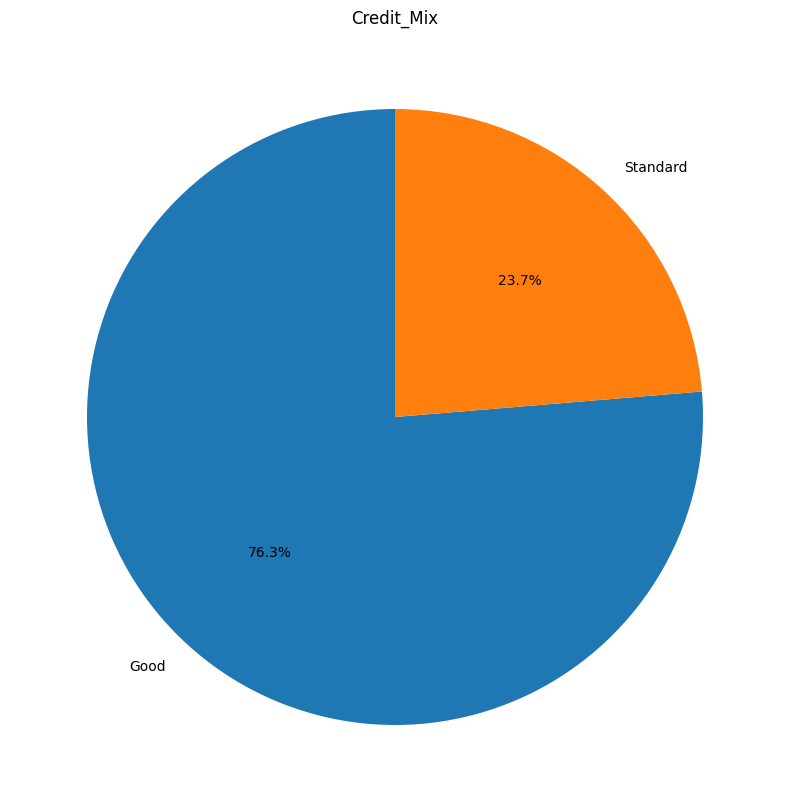

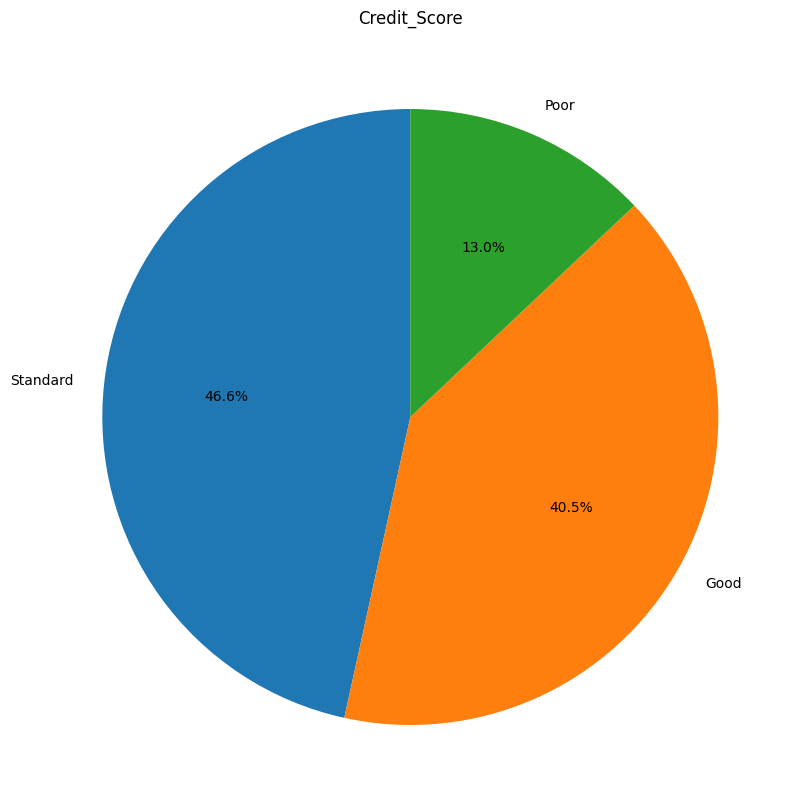

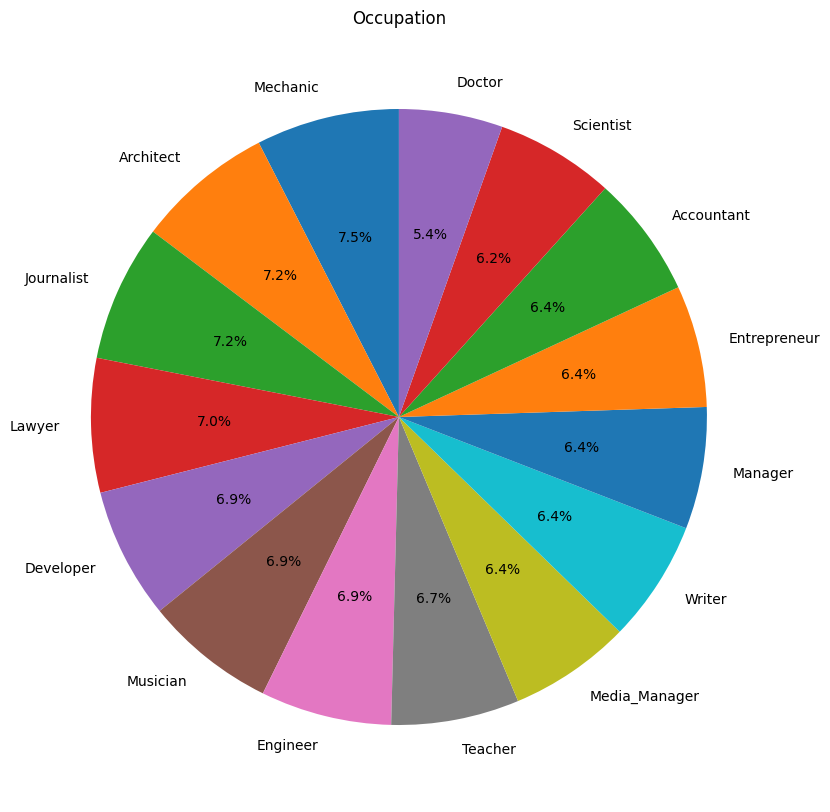

In [21]:
for col in categorical_col:
    pie_chart(top5_df,col)

Text(0.5, 0.98, 'only top 5 %')

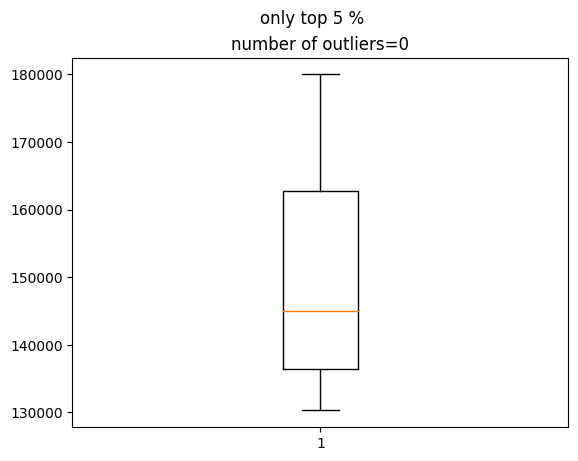

In [22]:
plt.boxplot(top5_df['Annual_Income'])
plt.title(f'number of outliers={number_outliers(top5_df,"Annual_Income")}')
plt.suptitle('only top 5 %')

<AxesSubplot: title={'center': 'Annual_Income'}, xlabel='Credit_Score'>

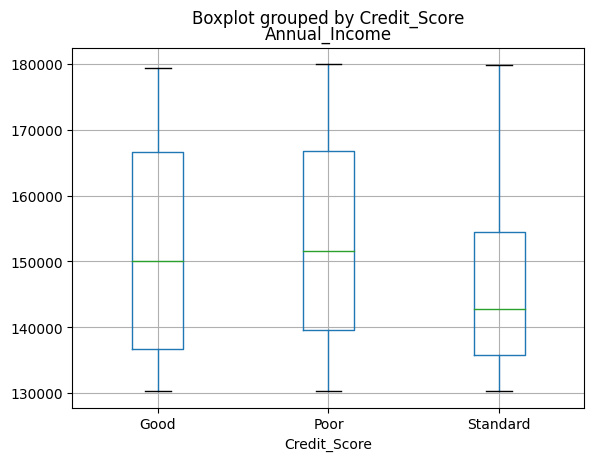

In [23]:
top5_df.boxplot('Annual_Income',by='Credit_Score')


In [24]:
not_top5_df

,ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
27046,63957.5,4.5,Freifeldv,31.000,675991025.0,Mechanic,130289.460,10677.455000,0.0,4.0,3.0,1.0,Home Equity Loan,3.000,3.250,2.380,1.875,Good,1175.61,35.738534,337.625,No,76.060734,72.214231,High_spent_Large_value_payments,963.319852,Good
31373,58173.5,4.5,arani Krishnanh,46.000,921215382.0,Architect,130232.250,10750.687500,5.0,3.0,7.0,1.0,Credit-Builder Loan,6.125,5.000,3.675,3.000,Good,1077.66,31.578060,228.500,No,60.039727,161.310744,High_spent_Medium_value_payments,817.588777,Standard
5313,142305.5,4.5,Denny Thomasz,37.000,695592005.0,Media_Manager,130220.080,11141.673333,6.0,3.0,14.0,3.0,Home Equity Loan,22.875,15.125,2.170,3.000,Standard,410.10,33.579799,355.500,Yes,245.924492,94.384586,Low_spent_Medium_value_payments,665.579212,Standard
42249,129669.5,4.5,Spicern,27.000,501024055.0,Engineer,130210.200,10971.850000,7.0,4.0,5.0,1.0,Home Equity Loan,17.750,9.125,17.695,4.000,Standard,61.98,34.704825,270.500,Yes,68.896136,228.214327,High_spent_Large_value_payments,795.404438,Standard
44305,145353.5,4.5,Caroline Valetkevitchy,37.000,249398538.0,Developer,130174.440,10993.870000,5.0,3.0,4.0,4.0,Credit-Builder Loan,3.875,5.000,5.660,1.000,Good,1418.16,34.308249,227.500,No,251.382914,110.211985,High_spent_Large_value_payments,688.423877,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,22113.5,4.5,Kyriakidouz,44.375,454530773.0,Musician,7012.310,577.359167,8.0,6.0,20.0,5.0,Student Loan,34.500,23.875,5.515,9.875,Bad,4784.12,31.491214,112.500,NM,20.582221,0.000000,High_spent_Small_value_payments,279.762923,Poor
6848,45165.5,4.5,Rick Rothackerd,36.125,728349997.0,Doctor,7011.685,680.307083,8.0,9.0,31.0,4.0,Personal Loan,23.875,19.875,1.580,9.250,Bad,2425.02,31.174767,209.500,Yes,18.872923,21.870742,Low_spent_Small_value_payments,276.752372,Poor
29344,15693.5,4.5,Herbst-Baylisso,26.000,474228142.0,Media_Manager,7006.520,811.876667,8.0,5.0,17.0,3.0,Auto Loan,43.000,20.250,7.945,6.000,Bad,1363.34,32.255532,144.500,Yes,16.980603,13.020702,Low_spent_Small_value_payments,283.399412,Poor


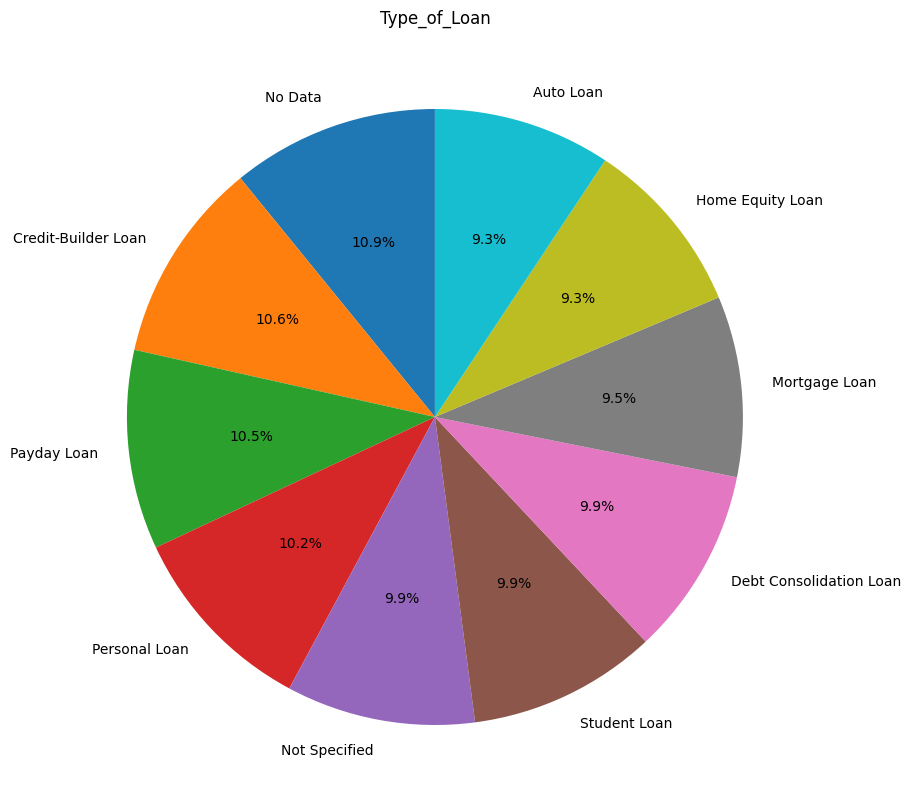

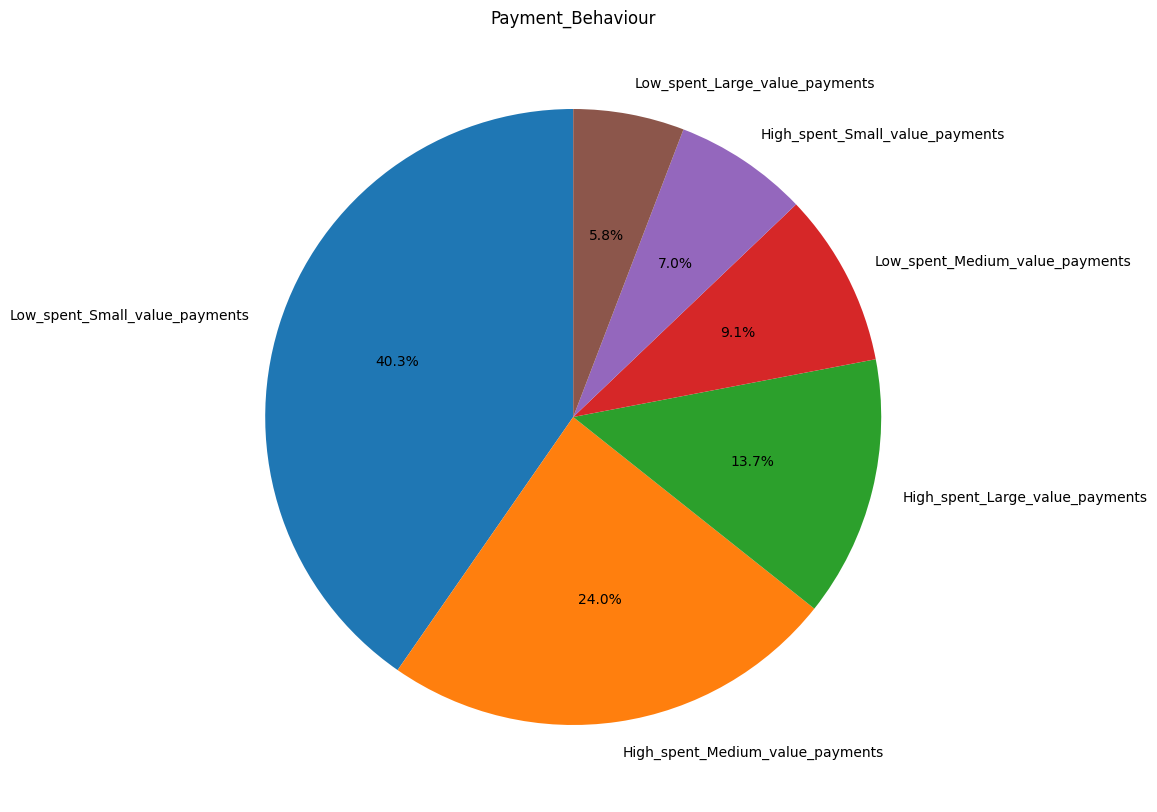

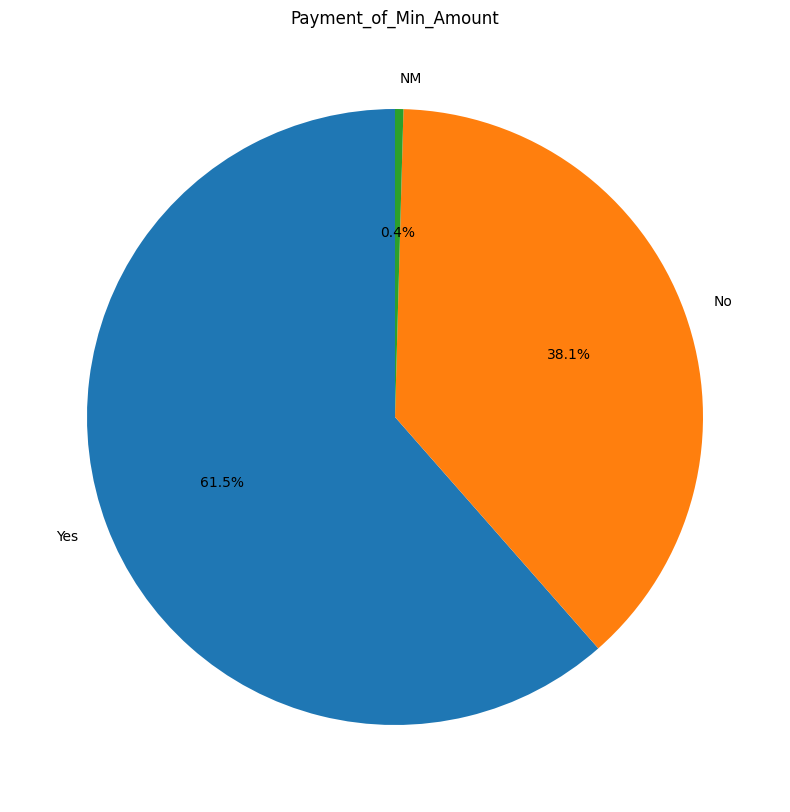

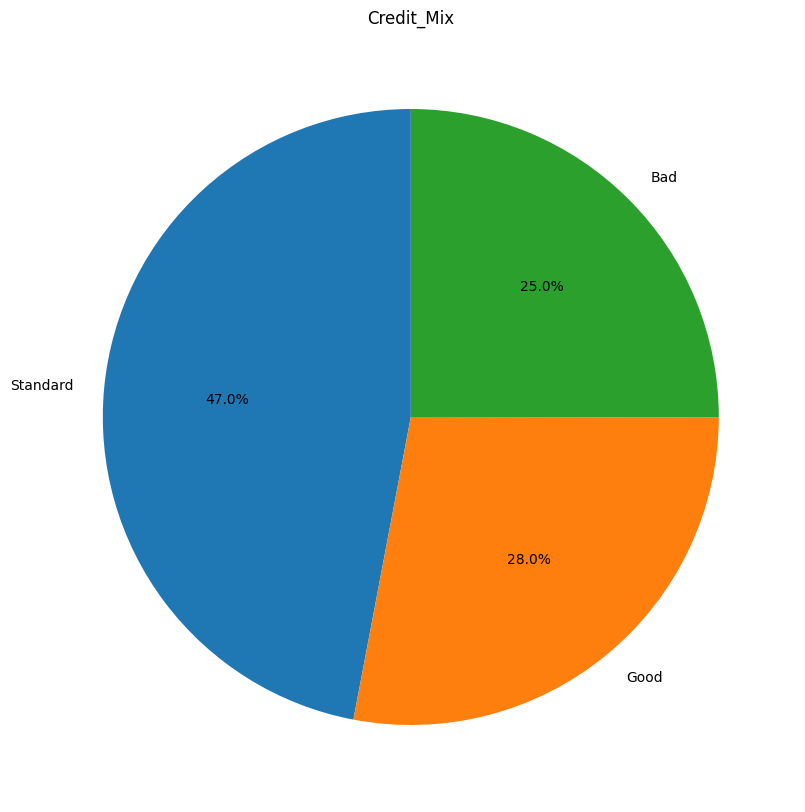

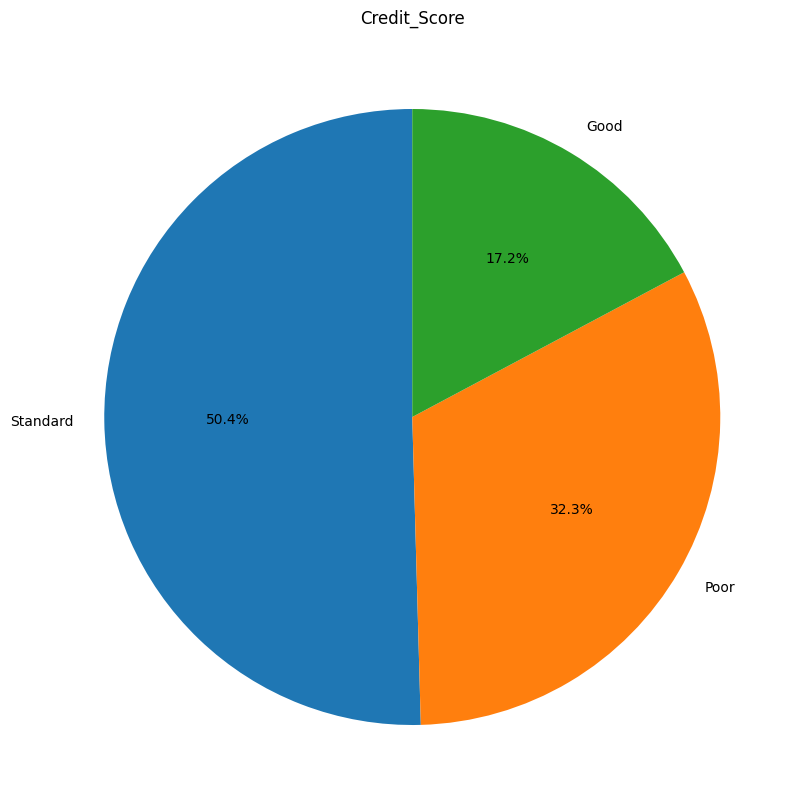

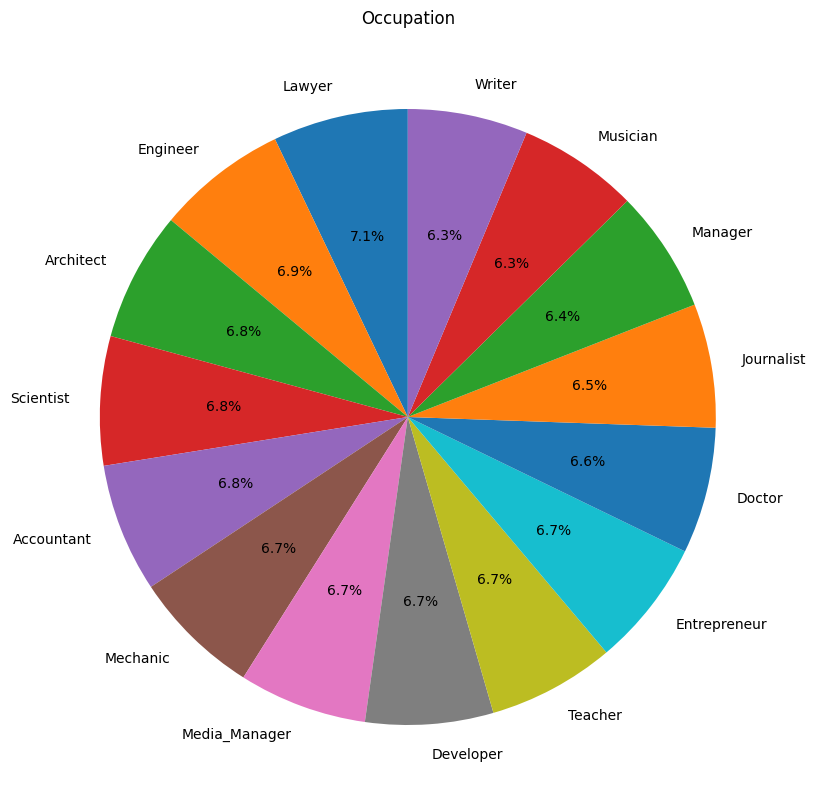

In [25]:
for col in categorical_col:
    pie_chart(not_top5_df,col)

Text(0.5, 0.98, 'with out top 5 %')

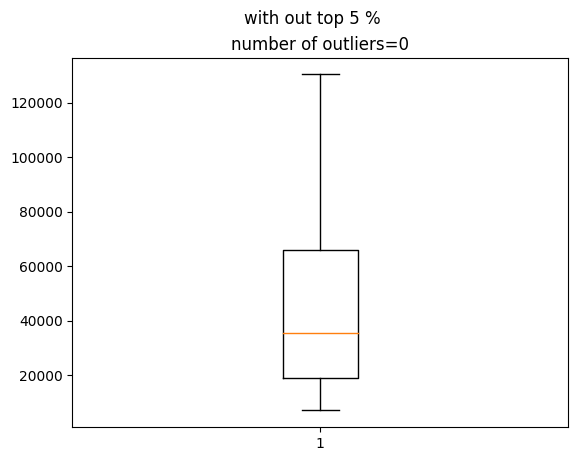

In [26]:
plt.boxplot(not_top5_df['Annual_Income'])
plt.title(f'number of outliers={number_outliers(not_top5_df,"Annual_Income")}')
plt.suptitle('with out top 5 %')

<AxesSubplot: title={'center': 'Annual_Income'}, xlabel='Credit_Score'>

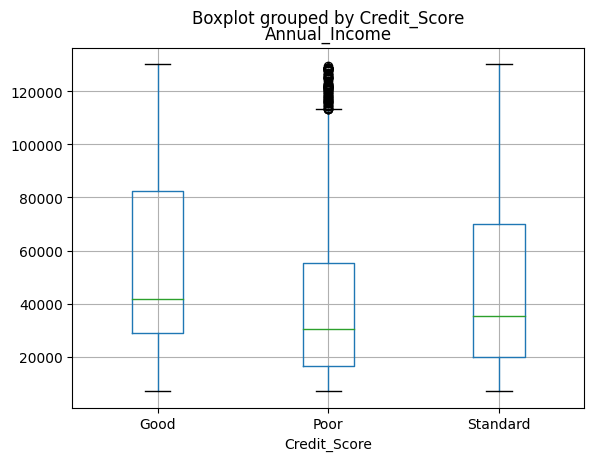

In [27]:
not_top5_df.boxplot('Annual_Income',by='Credit_Score')


## numerical data correlation

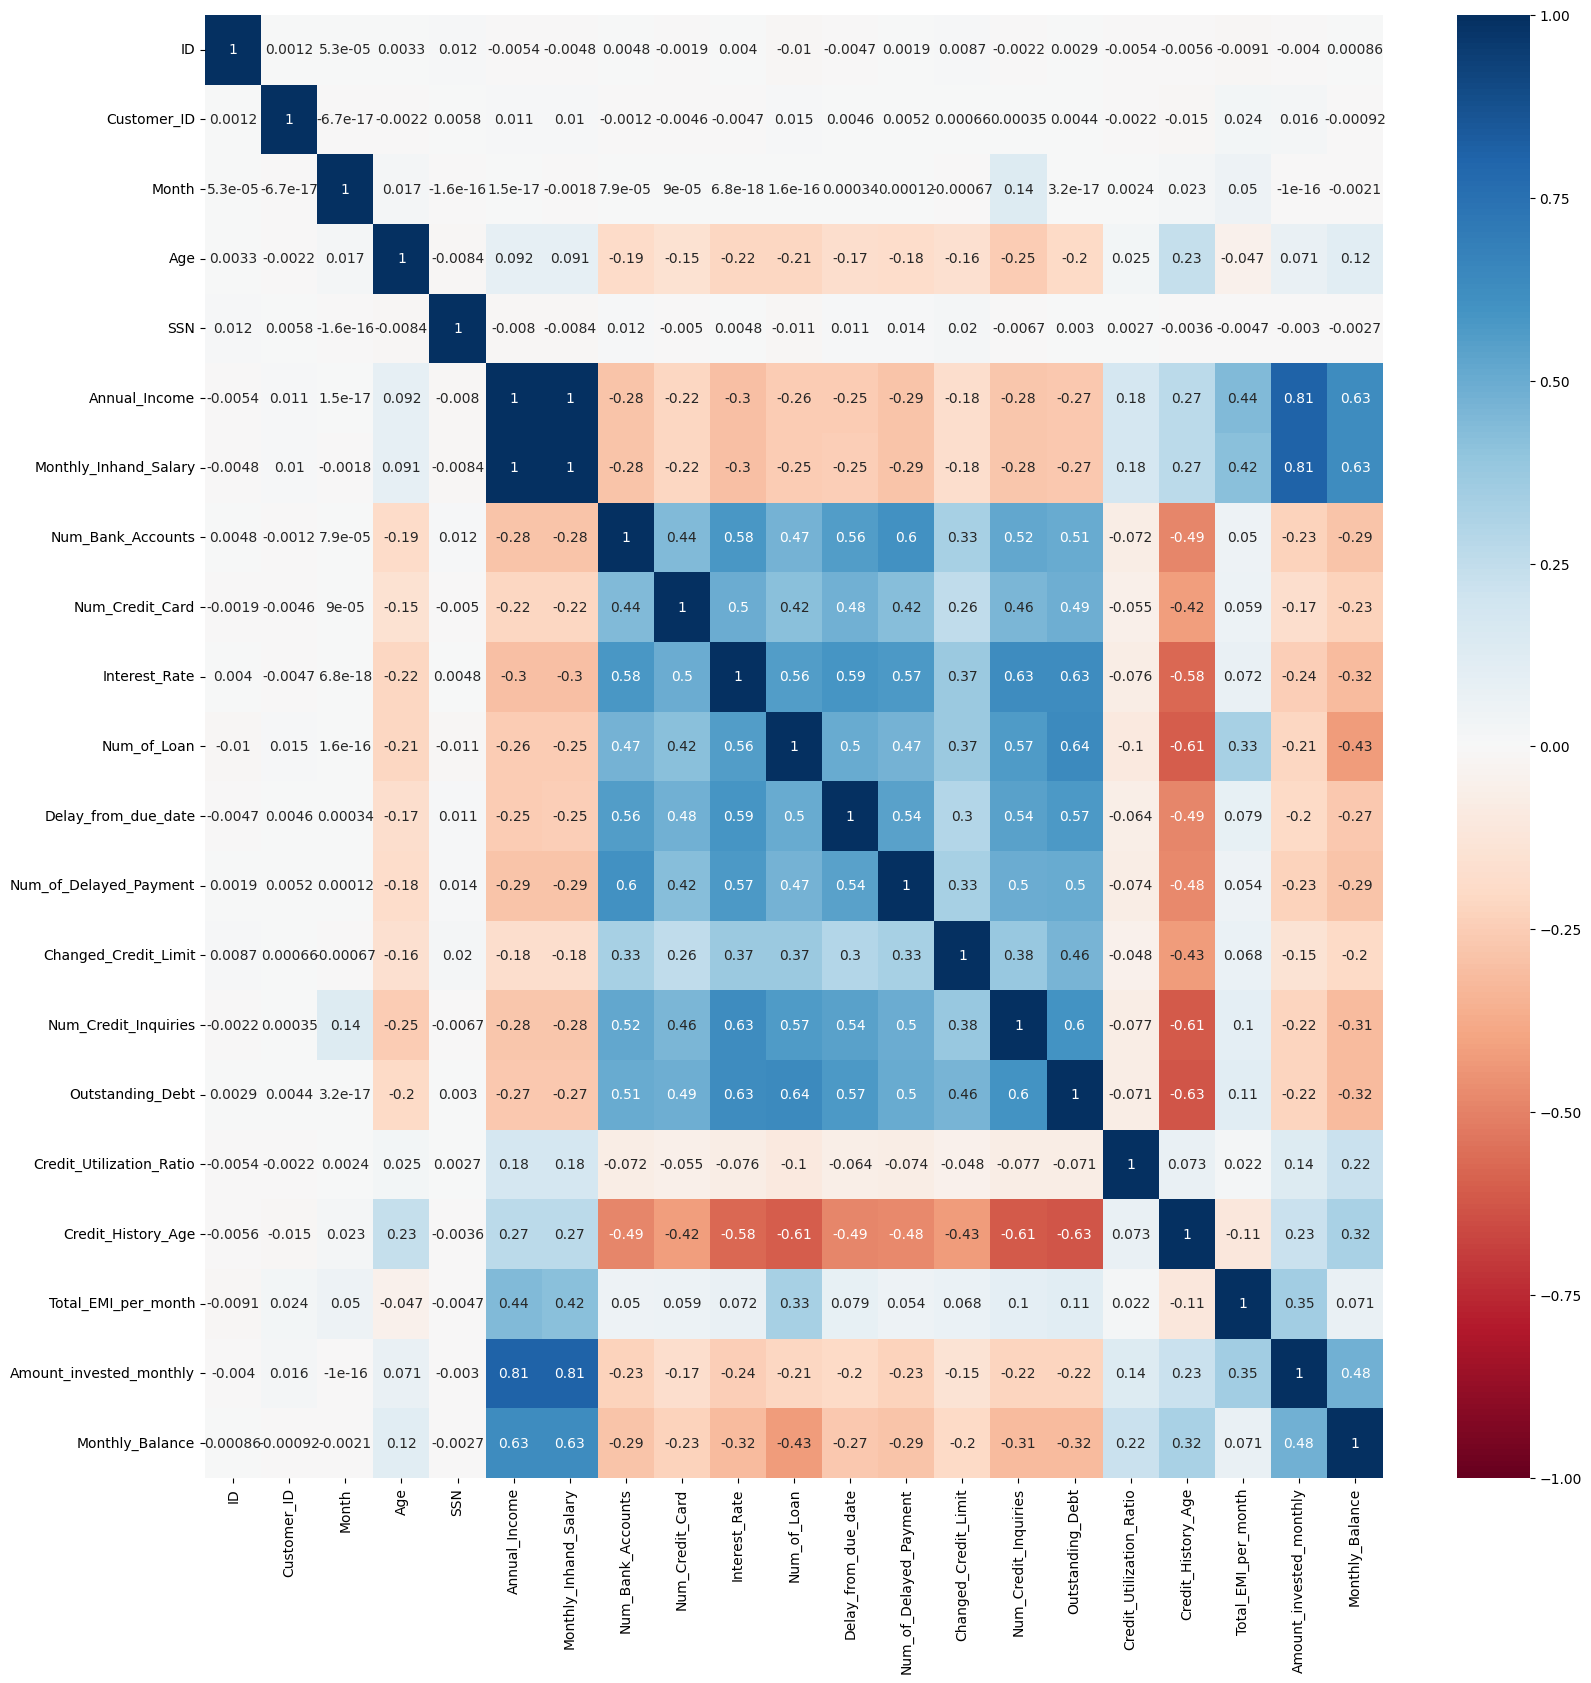

In [28]:
corrmat = df.corr()
top_corr = features = corrmat.index
plt.figure(figsize = (19,19))
# It is better to draw a heatmap 
g = sns.heatmap(df[top_corr].corr(), annot=True, cmap='RdBu' ,vmin=-1, vmax=1)

---
# 

## data frame encoding
ordinal encoding 

In [29]:
encoded_df=df.drop(noneed_col,axis=1).copy()
# encoded_df
dummies=encoded_df['Type_of_Loan'].str.replace('and','').str.replace(' ','').str.get_dummies(',')
encoded_df = pd.concat([encoded_df, dummies], axis=1)
encoded_df.drop('Type_of_Loan',axis=1,inplace=True)

encoded_df = pd.concat([encoded_df, encoded_df['Payment_Behaviour'].str.get_dummies(',')], axis=1)
encoded_df.drop('Payment_Behaviour',axis=1,inplace=True)


encoded_df['Credit_Score']=encoded_df['Credit_Score'].replace({"Poor": 0, "Standard": 1, "Good": 2})
encoded_df['Credit_Mix']=encoded_df['Credit_Mix'].replace({"Bad": 0, "Standard": 1, "Good": 2})
encoded_df['Payment_of_Min_Amount']=encoded_df['Payment_of_Min_Amount'].replace({"No": 0, "NM": 2, "Yes":1})


encoded_df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,AutoLoan,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NoData,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,2,809.98,26.822620,265.0,0,49.574949,21.465380,312.494089,2,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,2,809.98,31.944960,266.0,0,49.574949,21.465380,284.629162,2,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,2,809.98,28.609352,267.0,0,49.574949,21.465380,331.209863,2,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,2,809.98,31.377862,268.0,0,49.574949,21.465380,223.451310,2,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,2,809.98,24.797347,269.0,0,49.574949,21.465380,341.489231,2,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,2,502.38,34.663572,378.0,0,35.104023,24.028477,479.866228,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
99996,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,2,502.38,40.565631,379.0,0,35.104023,24.028477,496.651610,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
99997,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.50,3.0,2,502.38,41.255522,380.0,0,35.104023,24.028477,516.809083,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
99998,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,3.0,2,502.38,33.638208,381.0,0,35.104023,24.028477,319.164979,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


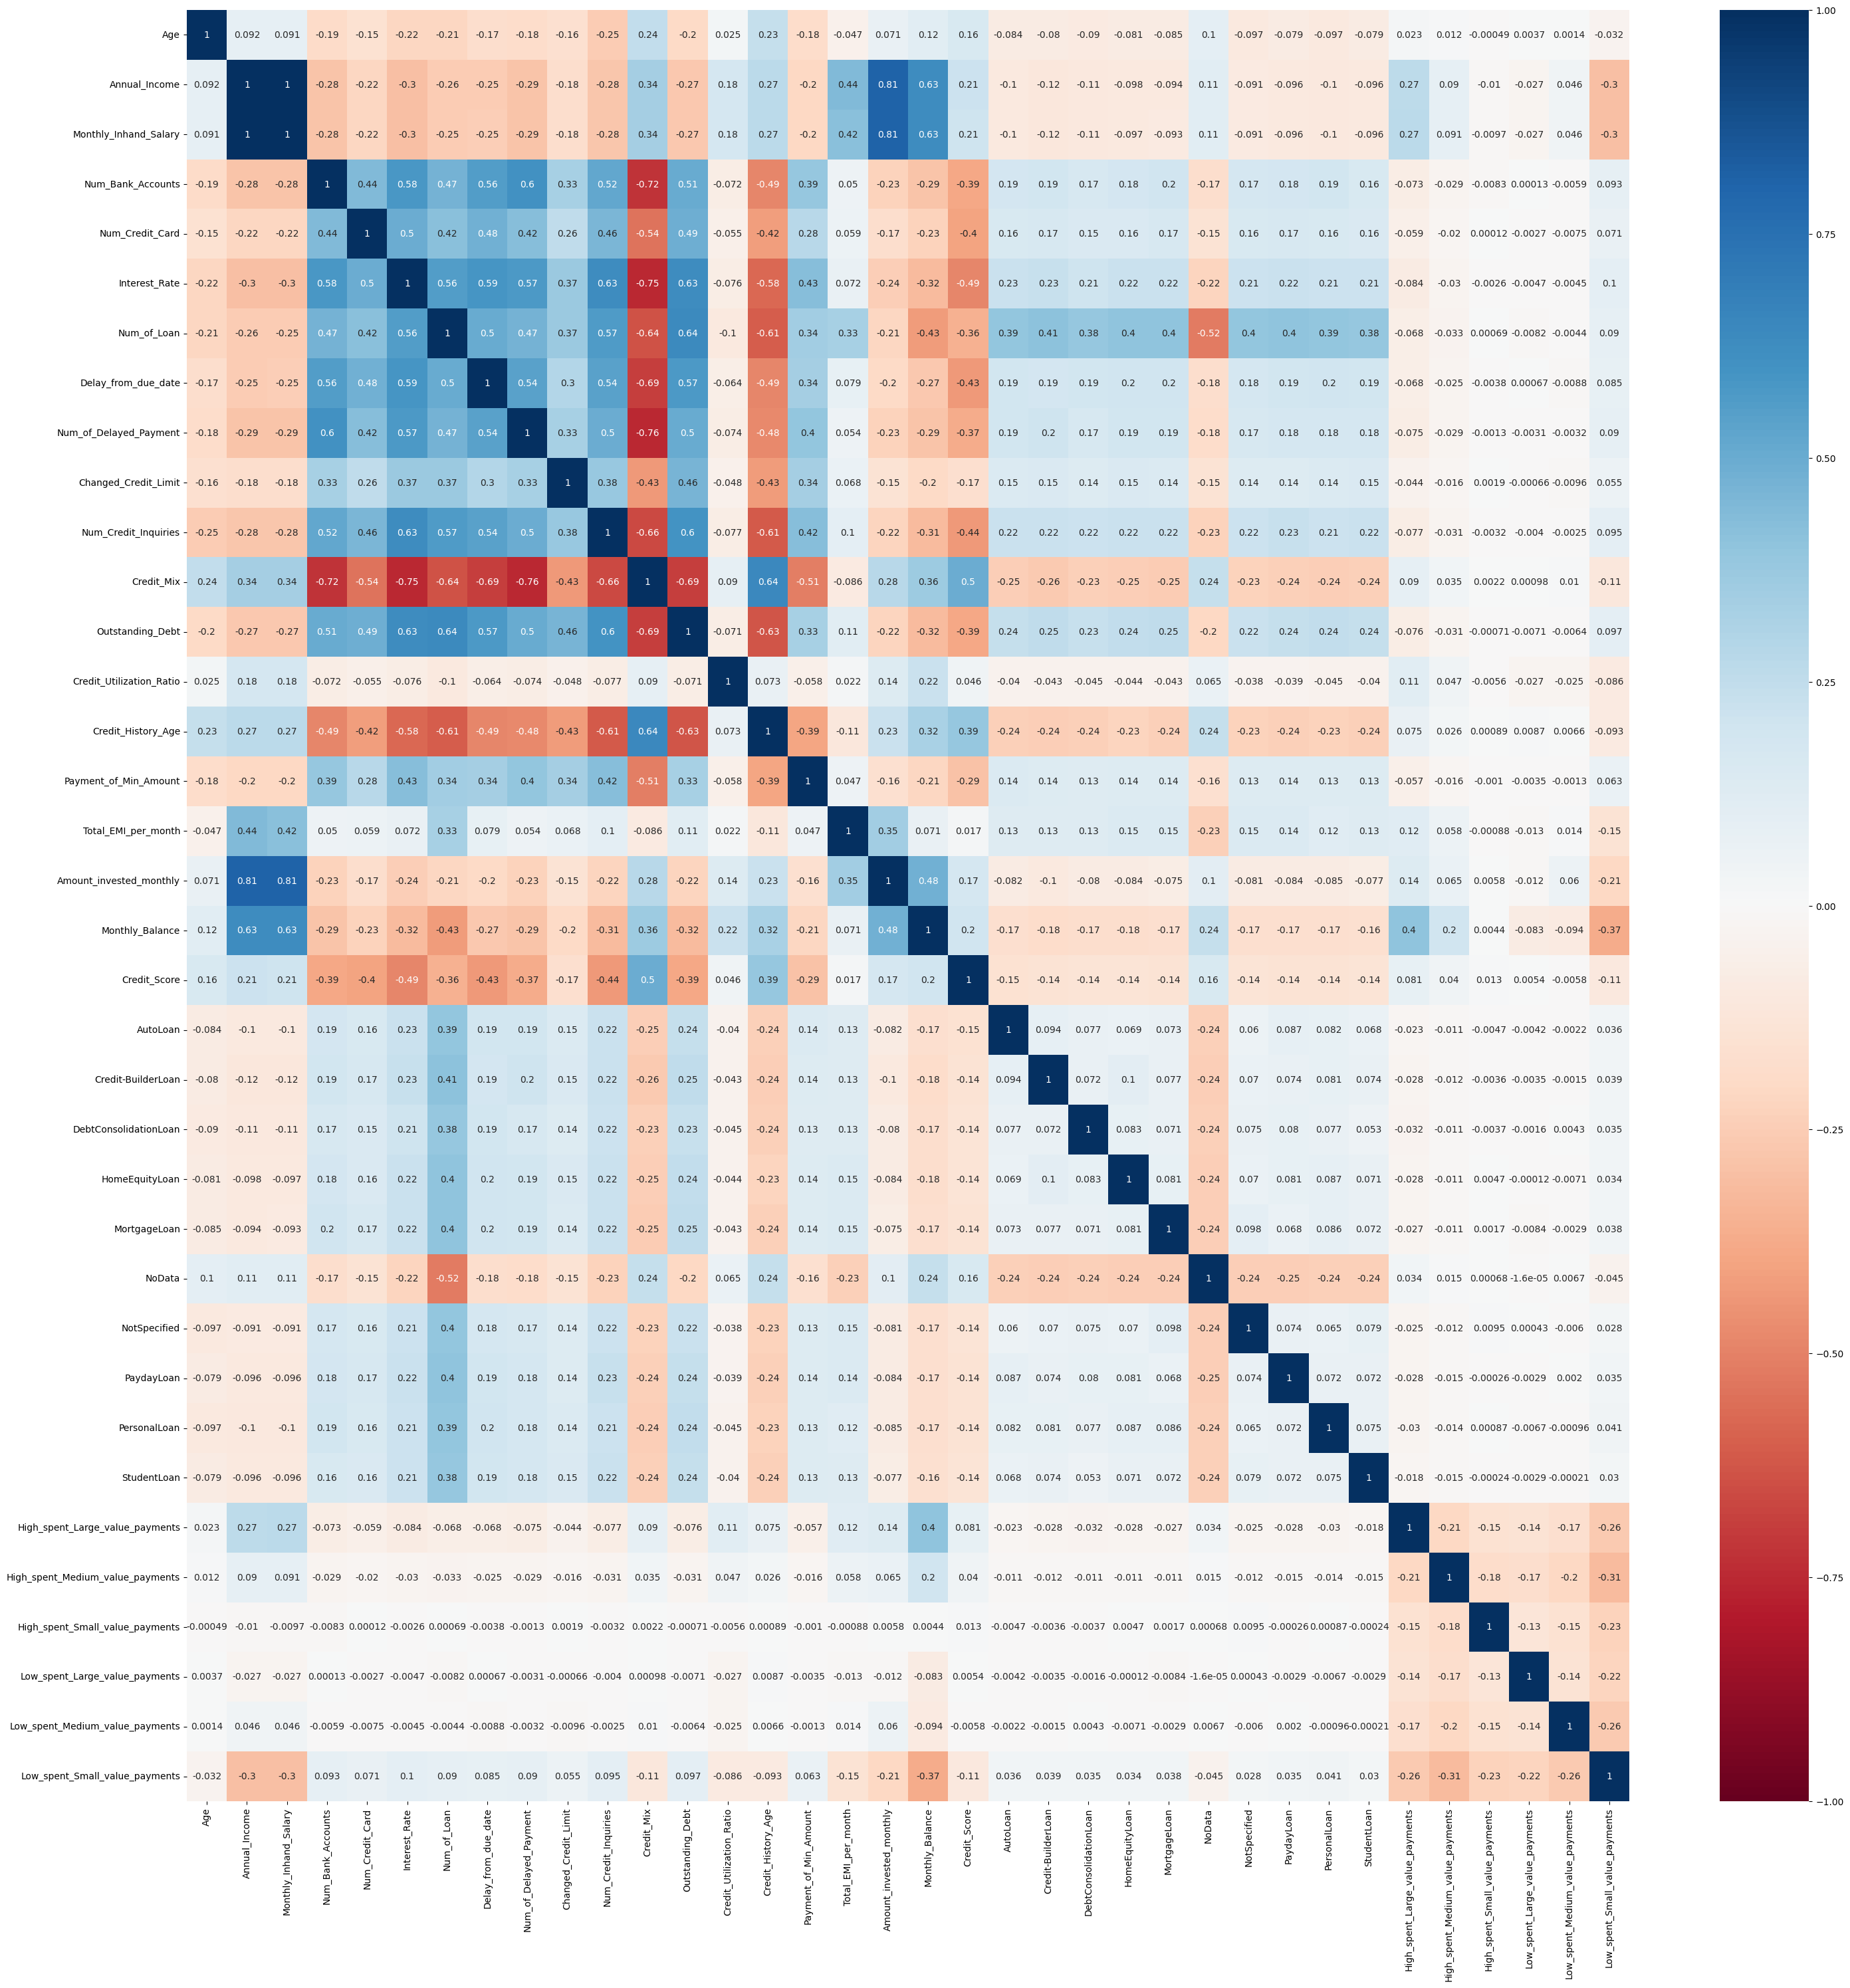

In [30]:
corrmat = encoded_df.corr()
top_corr = features = corrmat.index
plt.figure(figsize = (35,35))
# It is better to draw a heatmap 
g = sns.heatmap(encoded_df[top_corr].corr(), annot=True, cmap='RdBu' ,vmin=-1, vmax=1)

## Data Splitting

In [31]:
X=encoded_df.drop(['Credit_Score','Occupation'],axis=1)
y=encoded_df['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0,test_size=0.2,stratify=y)

## model 


In [32]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier ,AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


In [33]:
'''


models={
    'LR': LogisticRegression(max_iter=1000), 
    'KNN': KNeighborsClassifier(), 
    'DT': DecisionTreeClassifier(), 
    'RF': RandomForestClassifier(), 
    'XGB': XGBClassifier(objective='multi:softmax'),
    'ADAB': AdaBoostClassifier(),
    'GBC':GradientBoostingClassifier()
}

# takes 3.5 days
param_grid = {
    'LR': {'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['liblinear', 'saga']},
    'KNN': {'n_neighbors': [5, 10, 15], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree']},
    'DT': {'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']},
    'RF': {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, None], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 10]},
    'XGB': {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, None], 'learning_rate': [0.01, 0.1, 1.0], 'subsample': [0.5, 0.8, 1.0]},
    'ADAB': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 1.0], 'algorithm': ['SAMME', 'SAMME.R']},
    'GBC':{'n_estimators': [50, 100, 200],'learning_rate': [0.1, 0.5, 1.0], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'subsample': [0.5, 0.8, 1.0]}
}

# takes 1,5 hr
param_grid = {
    'LR': {'C': [0.01, 0.1, 1, 5, 10], 'class_weight': [None, 'balanced']},

    'KNN': {'n_neighbors': range(5, 30, 2)},

    'DT': {'max_depth': range(5, 14, 2), 'criterion': ['gini', 'entropy']},

    'RF': {'max_depth': range(5, 14, 2),'n_estimators': [50, 100, 200],'criterion': ['gini', 'entropy']},

    'XGB': {'max_depth': range(3, 12, 2),  'learning_rate': [0.01, 0.05, 0.15, 0.3],  'n_estimators': [50, 100, 200]},

    'ADAB': {'n_estimators': [50, 100, 200],   'learning_rate': [0.01, 0.5, 1, 3],},
    
    'GBC':{'n_estimators': [50, 100, 200],'learning_rate': [0.1, 0.5, 1.0], 'max_depth': [3, 5, 7]}

}

'''

"\n\n\nmodels={\n    'LR': LogisticRegression(max_iter=1000), \n    'KNN': KNeighborsClassifier(), \n    'DT': DecisionTreeClassifier(), \n    'RF': RandomForestClassifier(), \n    'XGB': XGBClassifier(objective='multi:softmax'),\n    'ADAB': AdaBoostClassifier(),\n    'GBC':GradientBoostingClassifier()\n}\n\n# takes 3.5 days\nparam_grid = {\n    'LR': {'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['liblinear', 'saga']},\n    'KNN': {'n_neighbors': [5, 10, 15], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree']},\n    'DT': {'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']},\n    'RF': {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, None], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 10]},\n    'XGB': {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, None], 'learning_rate': [0.01, 0.1, 1.0], 'subsample': [0.5, 0.8, 1.0]},\n    'ADAB': {'n_estimators': [50, 100, 20

In [34]:
'''

models_results={}

for i in [' no_pca',' pca']:
    for (name,model),model_parm in zip(models.items(), param_grid.values()):
        print(name+i)
        clf=model
    
        grid_clf = GridSearchCV(clf, param_grid = model_parm,n_jobs=6,cv=3,scoring='f1_weighted')
        grid_clf.fit(X_train, y_train)
        y_pred=grid_clf.best_estimator_.predict(X_test)
        pred_prob = grid_clf.best_estimator_.predict_proba(X_test)
    
        models_results.update({name+i:{'f1':f1_score(y_test, y_pred, average='weighted'),
                                    'accuracy':accuracy_score(y_test, y_pred),
                                    'roc_auc': roc_auc_score(y_test, pred_prob, multi_class="ovo"),
                                    'best_parms':grid_clf.best_params_}})
    
    pca = PCA(n_components ='mle').fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
        

models_results=pd.DataFrame(models_results).T.sort_values(by='f1',ascending=False)
models_results.to_csv('models_results.CSV')

'''

pd.read_csv('models_results.CSV')

,Unnamed: 0,f1,accuracy,roc_auc,best_parms
0,RF no_pca,0.818183,0.81820,0.936132,"{'criterion': 'gini', 'max_depth': None, 'min_..."
1,XGB no_pca,0.812843,0.81285,0.932756,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
2,GBC no_pca,0.806179,0.80615,0.926524,"{'learning_rate': 0.5, 'max_depth': 7, 'min_sa..."
3,XGB pca,0.803380,0.80350,0.927110,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
4,RF pca,0.800897,0.80110,0.925830,"{'criterion': 'entropy', 'max_depth': None, 'm..."
5,GBC pca,0.779990,0.78015,0.911183,"{'learning_rate': 0.5, 'max_depth': 7, 'min_sa..."
6,KNN no_pca,0.778467,0.77840,0.912663,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '..."
7,KNN pca,0.778467,0.77840,0.912663,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '..."
8,DT no_pca,0.743859,0.74400,0.796556,"{'criterion': 'entropy', 'max_depth': None, 'm..."
9,DT pca,0.704547,0.70450,0.764620,"{'criterion': 'gini', 'max_depth': None, 'min_..."


## feature selection

2 0.8069711804928441
3 0.8085679719560844
4 0.8106440009842754
5 0.7686726923744177
6 0.744496252998847
7 0.7545771141589576
8 0.7658980715070758
9 0.7644465001306138
10 0.7645448608313015
11 0.7505421657874828
12 0.7483407788587179
13 0.7417068792621
14 0.7485302802398495
15 0.758292007939479
16 0.7586575975112387
17 0.7637975688939967
18 0.763049683585737
19 0.7629781704827148
20 0.7621305675267266
21 0.7619783665943739
22 0.7651443190694122
23 0.7654794152606137
24 0.7640815297742481
25 0.765145871957863
26 0.7630368689787562
27 0.765637829524785
28 0.7661785107747927
29 0.7597458295567907
30 0.7611311200855922
31 0.7487288161401539
32 0.7511807574385765
33 0.7506336060048061
34 0.7460697546073101


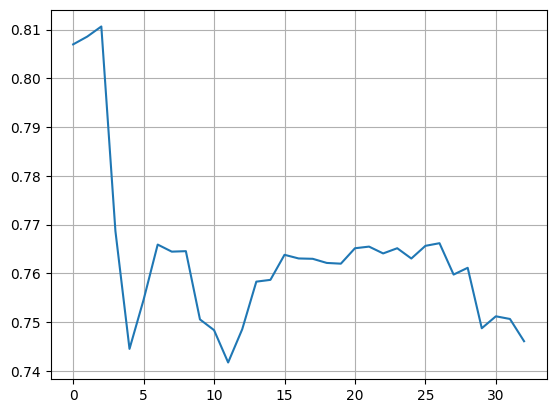

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
scores=[]
for i in range(2,len(X_train.columns)):
    k_best = SelectKBest(score_func=chi2, k=i)

    new_X_train = k_best.fit_transform(X_train, y_train)
    new_X_test=k_best.transform(X_test)
    model=DecisionTreeClassifier(random_state = 0)
    model.fit(new_X_train,y_train)
    f1=f1_score(y_test,model.predict(new_X_test),average = 'weighted')
    scores.append(f1)
    print(f"{i} {f1}")

plt.plot(scores)
plt.grid()


([0, 1, 2, 3],
 [Text(0, 0, 'Annual_Income'),
  Text(1, 0, 'Monthly_Inhand_Salary'),
  Text(2, 0, 'Outstanding_Debt'),
  Text(3, 0, 'Credit_History_Age')])

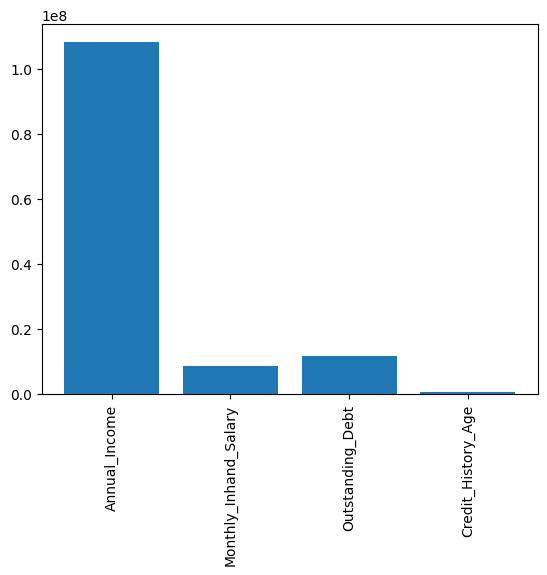

In [36]:
k_best = SelectKBest(score_func=chi2, k=4)

# Fit the SelectKBest model to the data
X_train_kb = k_best.fit_transform(X_train, y_train)
X_test_kb  =k_best.transform(X_test)

thescores=[]
feature_names=[]
indices=k_best.get_support(indices=True)
scores=k_best.scores_
for i in indices:
    thescores.append(scores[i])
    feature_names.append(X.columns[i])
    # print(X.columns[i], scores[i])

plt.bar(feature_names,thescores)
plt.xticks(rotation=90)


In [37]:
df[df['Amount_invested_monthly']==-0]['Annual_Income'].mean()


10063.809458333333

# modelling

In [38]:

def model_evaluation(model,train=X_train_kb,test=X_test_kb):
    y_pred=model.predict(test)
    y_pred_train=model.predict(train)
    
    print(f"train accuracy {accuracy_score(y_train, y_pred_train)}")
    print(f"test accuracy {accuracy_score(y_test, y_pred)}")
    
    print(classification_report(y_test, y_pred))
   
    

In [39]:

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
model_evaluation(dummy_majority)

train accuracy 0.5317375
test accuracy 0.53175
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5799
           1       0.53      1.00      0.69     10635
           2       0.00      0.00      0.00      3566

    accuracy                           0.53     20000
   macro avg       0.18      0.33      0.23     20000
weighted avg       0.28      0.53      0.37     20000



In [40]:

model=LogisticRegression()
model.fit(X_train_kb,y_train)
model_evaluation(model)


train accuracy 0.541575
test accuracy 0.5404
              precision    recall  f1-score   support

           0       0.53      0.32      0.40      5799
           1       0.55      0.83      0.66     10635
           2       0.31      0.03      0.05      3566

    accuracy                           0.54     20000
   macro avg       0.46      0.39      0.37     20000
weighted avg       0.50      0.54      0.48     20000



In [41]:
## estimated time 1 hr

# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import roc_auc_score

# grid_values = param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2']
# }


# clf=DecisionTreeClassifier(random_state = 0)

# # default metric to optimize over grid parameters: accuracy
# grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,n_jobs=6)
# grid_clf_acc.fit(X_train_kb, y_train)
# y_decision_fn_scores_acc = grid_clf_acc.predict_proba(X_test_kb) 

# print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
# print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# # alternative metric to optimize over grid parameters: AUC
# grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc',n_jobs=6)
# grid_clf_auc.fit(X_train_kb, y_train)
# y_decision_fn_scores_auc = grid_clf_auc.predict_proba(X_test_kb) 

# print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc, multi_class="ovr"))
# print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
# print('Grid best score (AUC): ', grid_clf_auc.best_score_)
'''
Grid best parameter (max. accuracy):  {'ccp_alpha': 0.001, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 0.8, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Grid best score (accuracy):  0.7736842105263158

Test set AUC:  0.7354542008263274
Grid best parameter (max. AUC):  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Grid best score (AUC):  nan

Test set f1:  0.68
Grid best parameter (max. f1):  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Grid best score (f1):  nan

'''


"\nGrid best parameter (max. accuracy):  {'ccp_alpha': 0.001, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 0.8, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}\nGrid best score (accuracy):  0.7736842105263158\n\nTest set AUC:  0.7354542008263274\nGrid best parameter (max. AUC):  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}\nGrid best score (AUC):  nan\n\nTest set f1:  0.68\nGrid best parameter (max. f1):  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}\nGrid best score (f1):  nan\n\n"

In [42]:
# ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, splitter='best'            ## for f1
# ccp_alpha=0.001, class_weight=None, criterion='gini', max_depth=10, max_features=0.8, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=10, splitter='best'            ## for acc
# ccp_alpha= 0.0, class_weight= None, criterion= 'gini', max_depth= None, max_features= None, min_impurity_decrease= 0.0, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best'   ## for AUC

model=DecisionTreeClassifier(random_state = 0,ccp_alpha=0.001, criterion='gini', max_depth=10, max_features=0.8, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=10, splitter='best')

model.fit(X_train_kb,y_train)
model_evaluation(model)
# pd.DataFrame({'col':X_train.columns,'import':model.feature_importances_}).sort_values('import',ascending=False)


train accuracy 0.61375
test accuracy 0.6188
              precision    recall  f1-score   support

           0       0.69      0.53      0.60      5799
           1       0.60      0.87      0.71     10635
           2       0.00      0.00      0.00      3566

    accuracy                           0.62     20000
   macro avg       0.43      0.47      0.44     20000
weighted avg       0.52      0.62      0.55     20000



In [43]:
model.predict(X_train_kb)


array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components ='mle').fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model=LogisticRegression()
model.fit(X_train_pca,y_train)

model_evaluation(model,X_train_pca,X_test_pca)


train accuracy 0.483175
test accuracy 0.48205
              precision    recall  f1-score   support

           0       0.58      0.75      0.65      5799
           1       0.71      0.25      0.37     10635
           2       0.30      0.75      0.43      3566

    accuracy                           0.48     20000
   macro avg       0.53      0.58      0.48     20000
weighted avg       0.60      0.48      0.46     20000



In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train_kb,y_train)

X_train_lda = lda.transform(X_train_kb)
X_test_lda = lda.transform(X_test_kb)

model=LogisticRegression()
model.fit(X_train_lda,y_train)

model_evaluation(model,X_train_lda,X_test_lda)



train accuracy 0.535325
test accuracy 0.5358
              precision    recall  f1-score   support

           0       0.51      0.27      0.36      5799
           1       0.55      0.84      0.66     10635
           2       0.39      0.05      0.09      3566

    accuracy                           0.54     20000
   macro avg       0.48      0.39      0.37     20000
weighted avg       0.51      0.54      0.47     20000

